C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


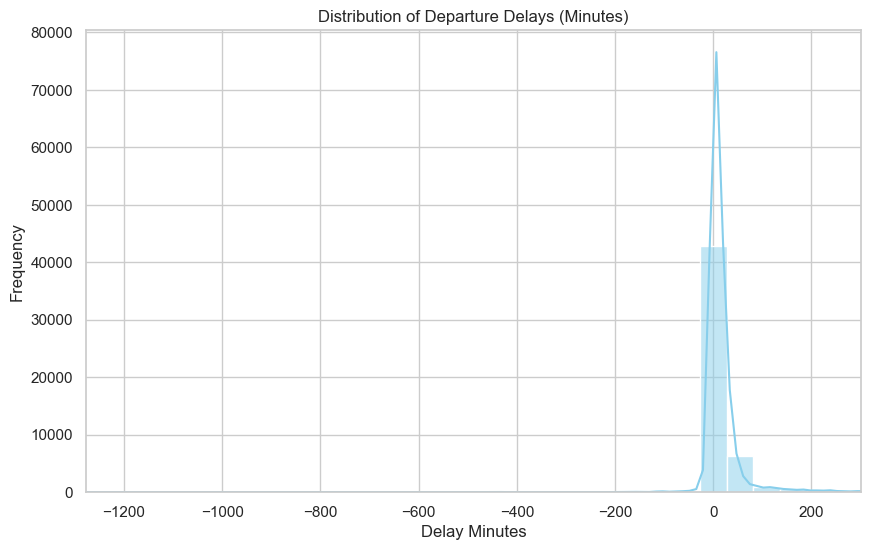

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_data = pd.read_csv('merged_flight_weather_data.csv')  # Replace with your actual path

# Set plot style
sns.set(style="whitegrid")



C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


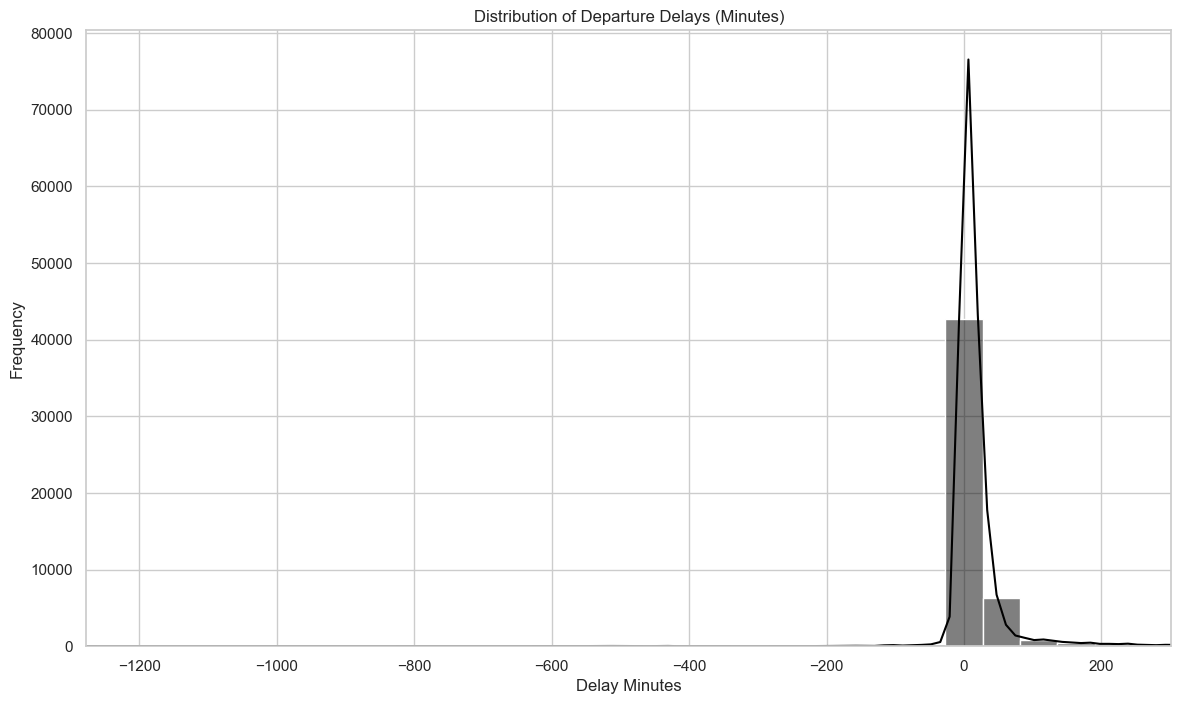

In [17]:
# Histogram of Departure Delays
plt.figure(figsize=(14,8))
sns.histplot(merged_data['departure.delay_minutes'], bins=50, kde=True, color='black')
plt.title('Distribution of Departure Delays (Minutes)')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.xlim(merged_data['departure.delay_minutes'].min(), merged_data['departure.delay_minutes'].quantile(0.99))
plt.show()


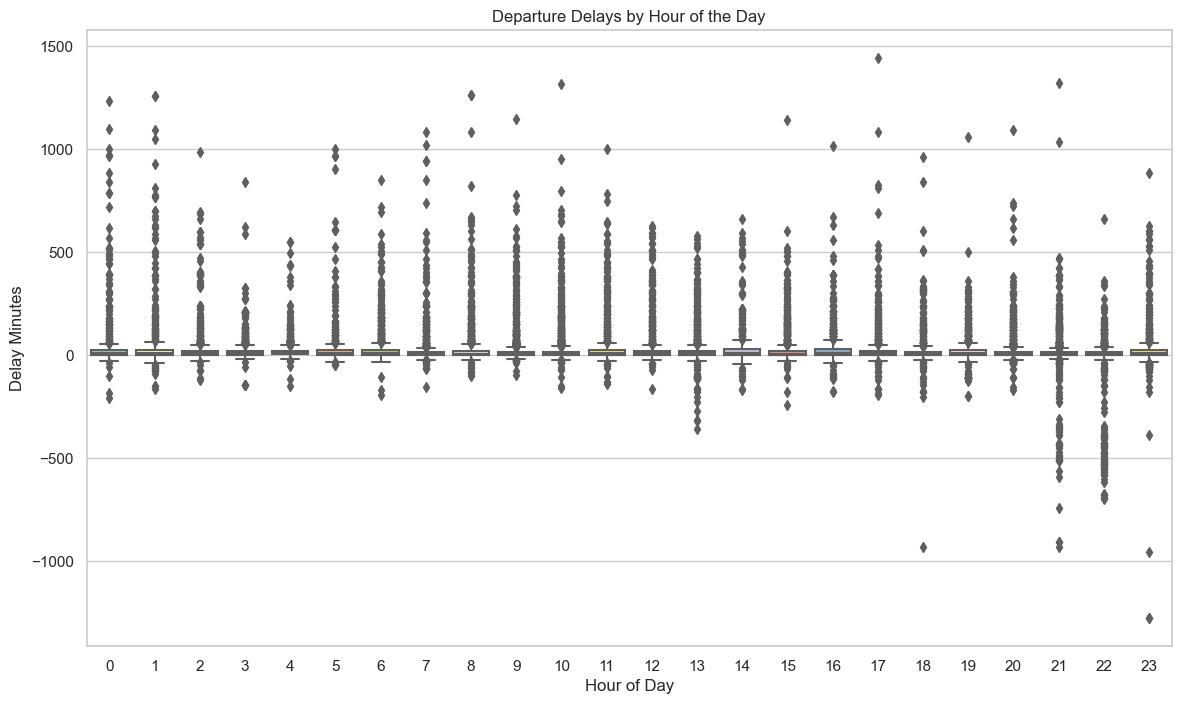

In [7]:
# Boxplot of Delays by Departure Hour
plt.figure(figsize=(14,8))
sns.boxplot(x='Departure_Hour', y='departure.delay_minutes', data=merged_data, palette='Set3')
plt.title('Departure Delays by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delay Minutes')
plt.show()


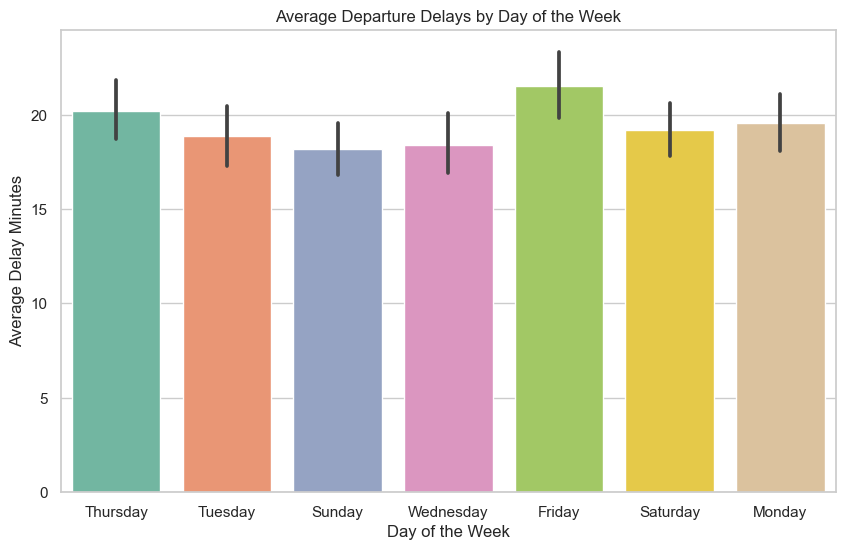

In [19]:
# Bar Plot of Average Delays by Day of the Week
plt.figure(figsize=(10,6))
sns.barplot(x='Departure_DayOfWeek', y='departure.delay_minutes', data=merged_data, palette='Set2')
plt.title('Average Departure Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay Minutes')
plt.show()


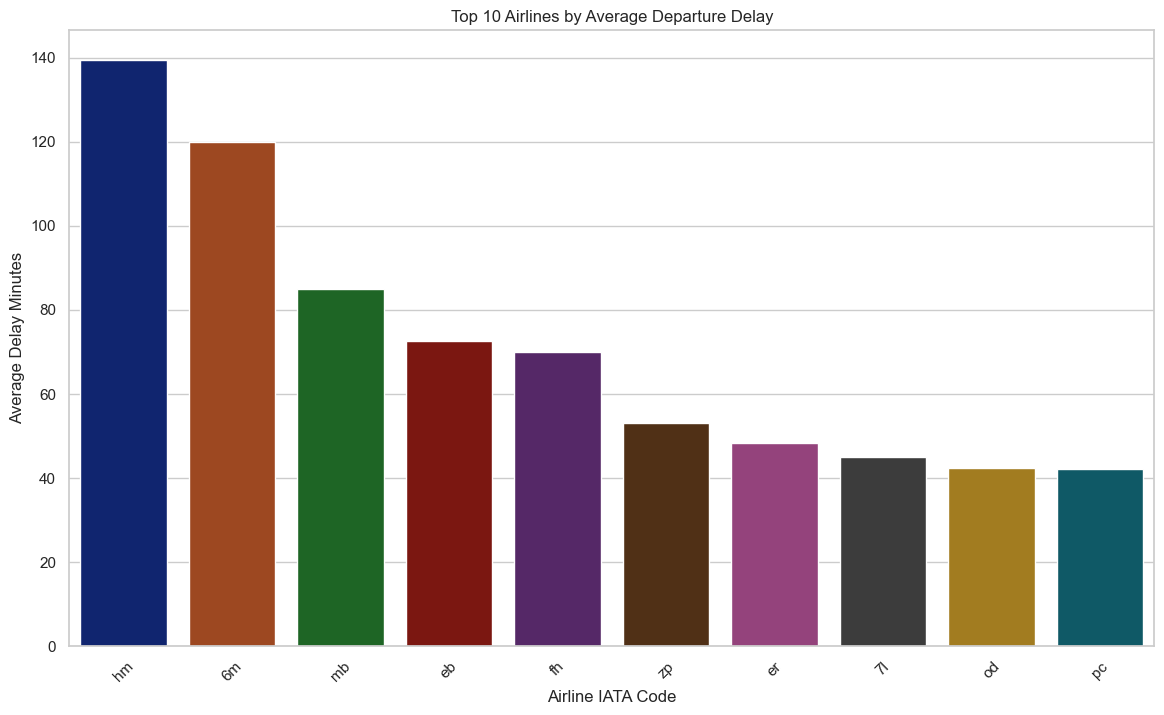

In [31]:
# Top 10 Airlines by Average Delay
top_airlines = merged_data.groupby('airline.iataCode')['departure.delay_minutes'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14,8))
sns.barplot(x='airline.iataCode', y='departure.delay_minutes', data=top_airlines, palette='dark')
plt.title('Top 10 Airlines by Average Departure Delay')
plt.xlabel('Airline IATA Code')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45)
plt.show()


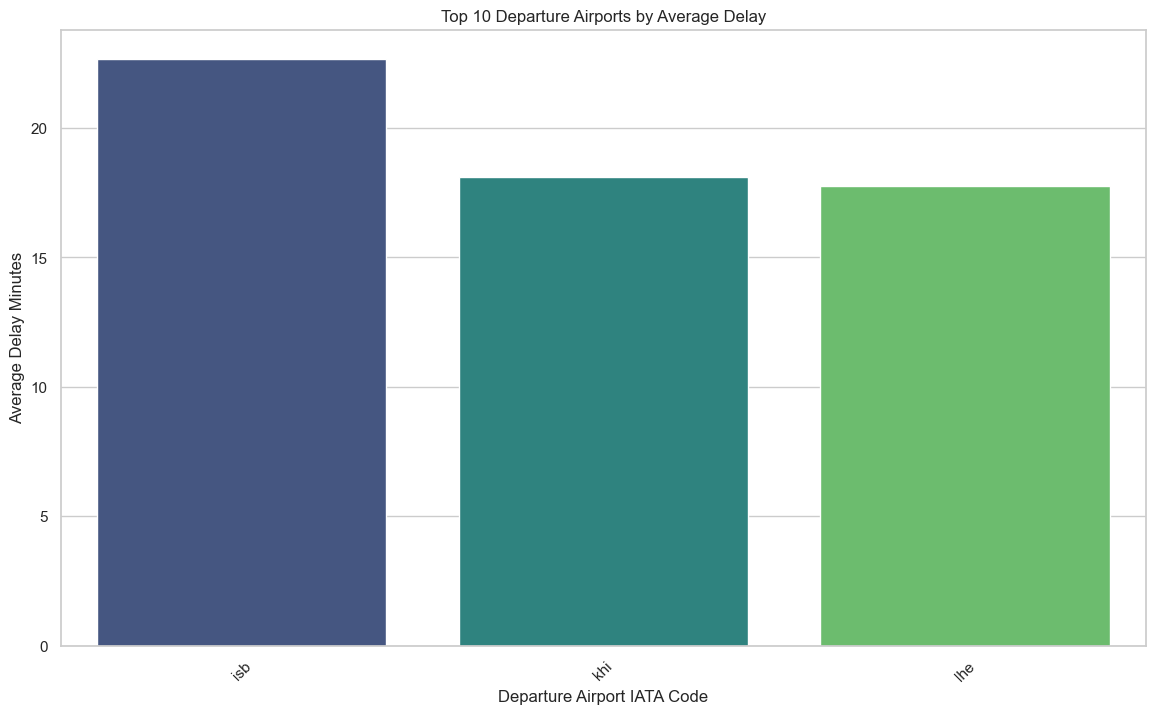

In [35]:
# Top 10 Departure Airports by Average Delay
top_departure_airports = merged_data.groupby('departure.iataCode')['departure.delay_minutes'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14,8))
sns.barplot(x='departure.iataCode', y='departure.delay_minutes', data=top_departure_airports, palette='viridis')
plt.title('Top 10 Departure Airports by Average Delay')
plt.xlabel('Departure Airport IATA Code')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45)
plt.show()


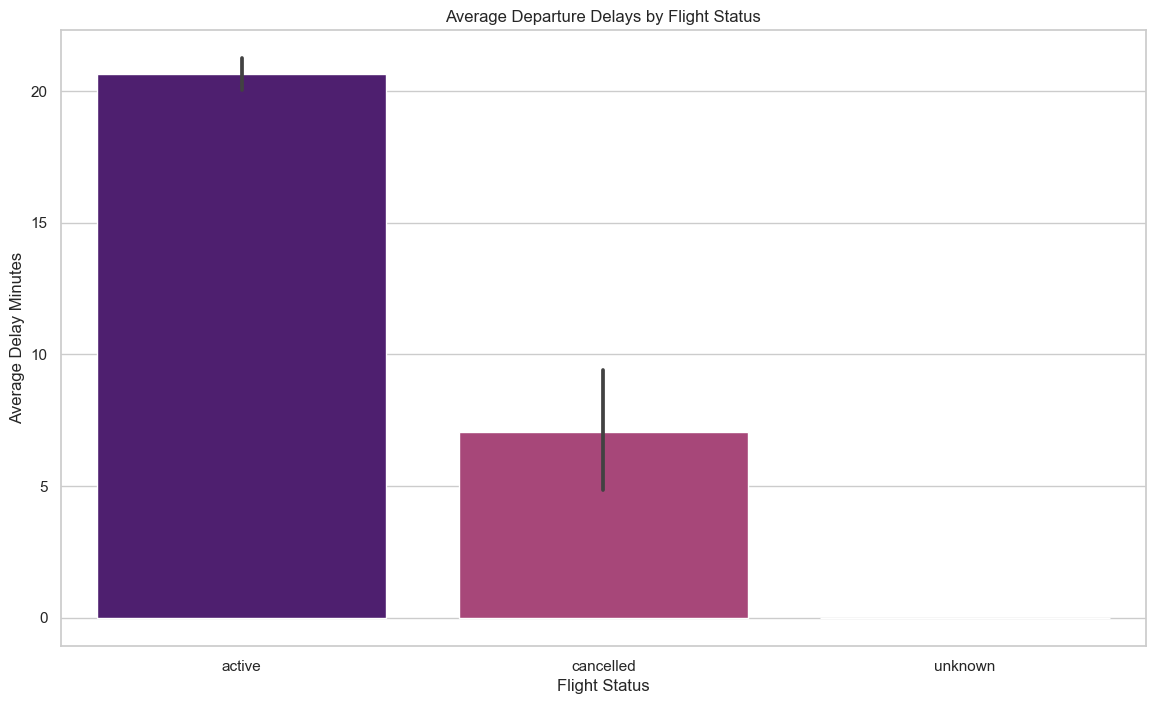

In [39]:
# Average Delays by Flight Status
plt.figure(figsize=(14,8))
sns.barplot(x='status', y='departure.delay_minutes', data=merged_data, palette='magma')
plt.title('Average Departure Delays by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Average Delay Minutes')
plt.show()


C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


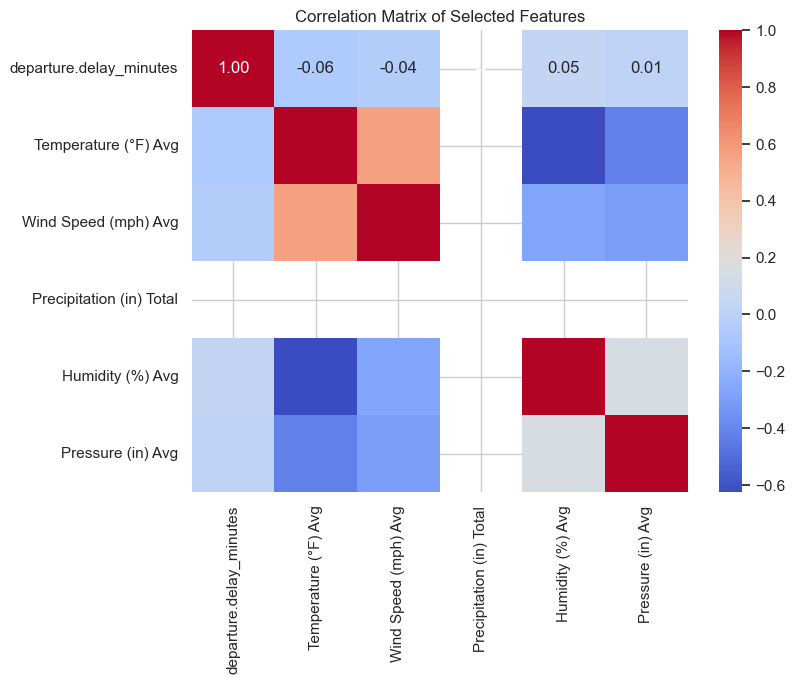

In [41]:
# Selecting numerical features related to weather and delays
corr_features = ['departure.delay_minutes', 
                'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
                'Precipitation (in) Total', 'Humidity (%) Avg', 
                'Pressure (in) Avg']

# Compute correlation matrix
corr_matrix = merged_data[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [47]:
corr_matrix

,departure.delay_minutes,Temperature (°F) Avg,Wind Speed (mph) Avg,Precipitation (in) Total,Humidity (%) Avg,Pressure (in) Avg
departure.delay_minutes,1.000000,-0.059078,-0.040838,NaN,0.046805,0.014560
Temperature (°F) Avg,-0.059078,1.000000,0.567154,NaN,-0.625792,-0.427209
Wind Speed (mph) Avg,-0.040838,0.567154,1.000000,NaN,-0.266074,-0.303747
Precipitation (in) Total,NaN,NaN,NaN,NaN,NaN,NaN
Humidity (%) Avg,0.046805,-0.625792,-0.266074,NaN,1.000000,0.152269
Pressure (in) Avg,0.014560,-0.427209,-0.303747,NaN,0.152269,1.000000


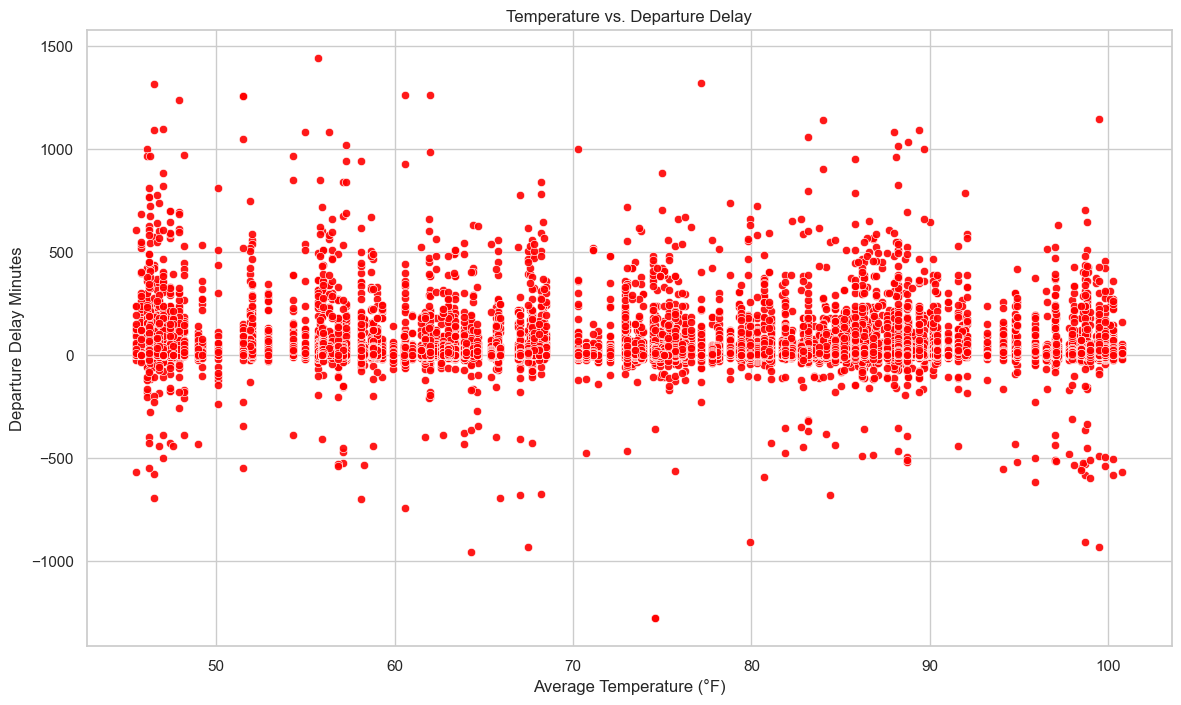

In [59]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Temperature (°F) Avg', y='departure.delay_minutes', data=merged_data, alpha=0.9, color='red')
plt.title('Temperature vs. Departure Delay')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Departure Delay Minutes')
plt.show()


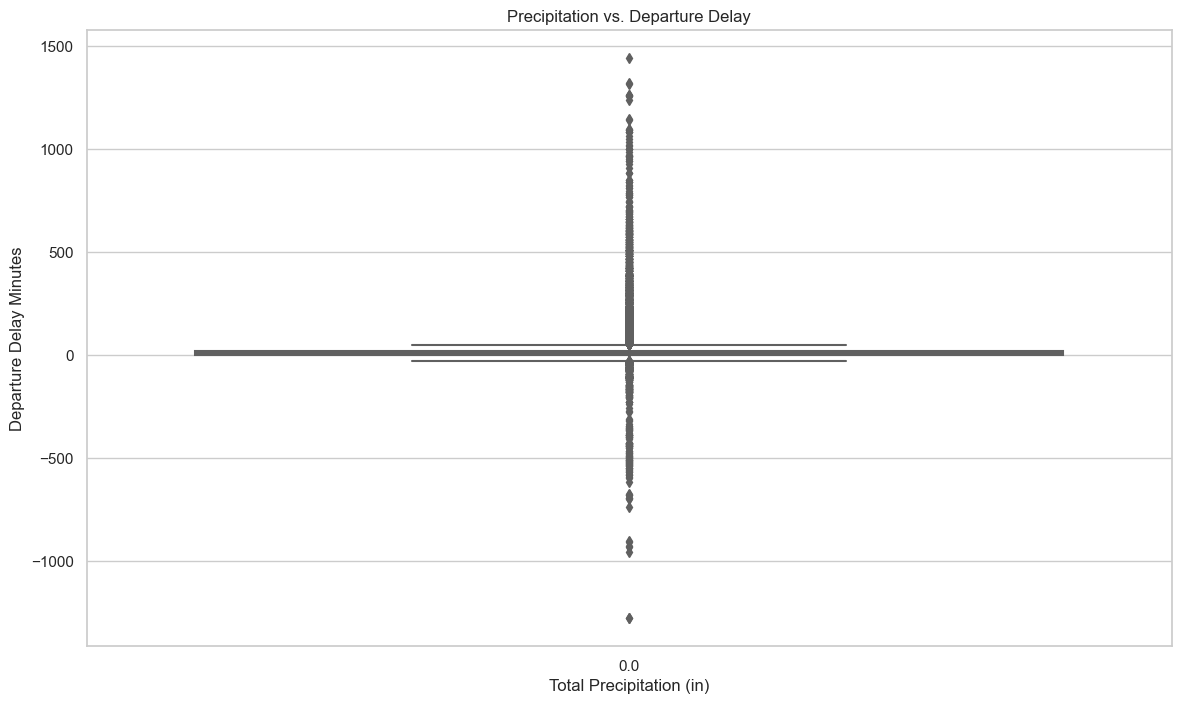

In [63]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Precipitation (in) Total', y='departure.delay_minutes', data=merged_data, palette='Blues')
plt.title('Precipitation vs. Departure Delay')
plt.xlabel('Total Precipitation (in)')
plt.ylabel('Departure Delay Minutes')
plt.show()


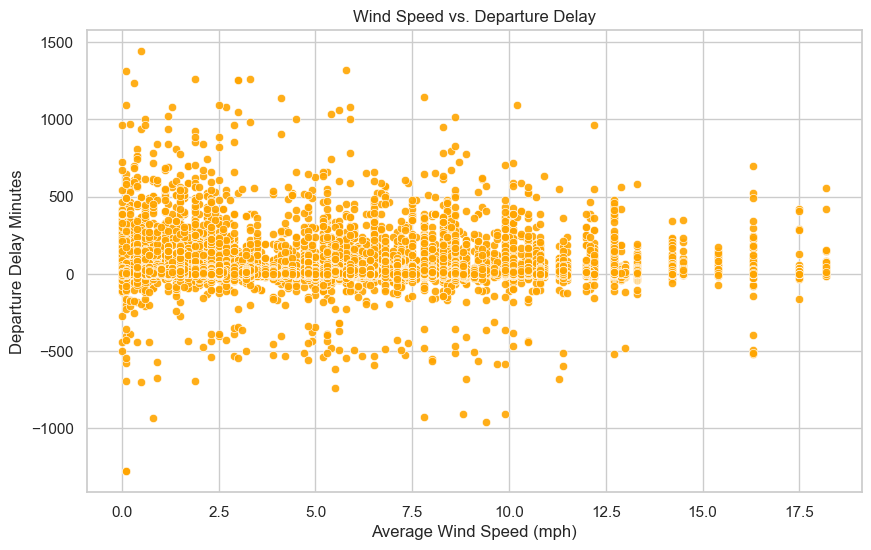

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind Speed (mph) Avg', y='departure.delay_minutes', data=merged_data, alpha=0.9, color='orange')
plt.title('Wind Speed vs. Departure Delay')
plt.xlabel('Average Wind Speed (mph)')
plt.ylabel('Departure Delay Minutes')
plt.show()


# Comparison Between Training and Testing Datasets


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned training dataset
train_data = pd.read_csv('merged_flight_weather_data.csv')  # Replace with your actual path

# Load the cleaned test dataset
test_data = pd.read_csv('merged_cleaned_test_flight_weather_data.csv')  # Replace with your actual path

# Display the structure of the datasets
print("\nTraining Data Structure:")
print(train_data.info(100))

print("\nTest Data Structure:")
print(test_data.info(100))



Training Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51871 entries, 0 to 51870
Data columns (total 146 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    status                                        object 
 1    departure.iataCode                            object 
 2    departure.icaoCode                            object 
 3    departure.terminal                            object 
 4    departure.scheduledTime                       object 
 5    departure.estimatedTime                       object 
 6    departure.actualTime                          object 
 7    departure.estimatedRunway                     object 
 8    departure.actualRunway                        object 
 9    arrival.scheduledTime                         object 
 10   arrival.estimatedTime                         object 
 11   airline.iataCode                              object 
 12   airline.icaoCode  

In [100]:
# Display basic statistics for 'departure.delay_minutes' in training data
print("\nTraining Data 'departure.delay_minutes' Statistics:")
print(train_data['departure.delay_minutes'].describe())



Training Data 'departure.delay_minutes' Statistics:
count    51871.000000
mean        19.425671
std         67.203683
min      -1277.000000
25%          0.000000
50%          8.000000
75%         20.000000
max       1440.000000
Name: departure.delay_minutes, dtype: float64


# Feature Importance Visualization

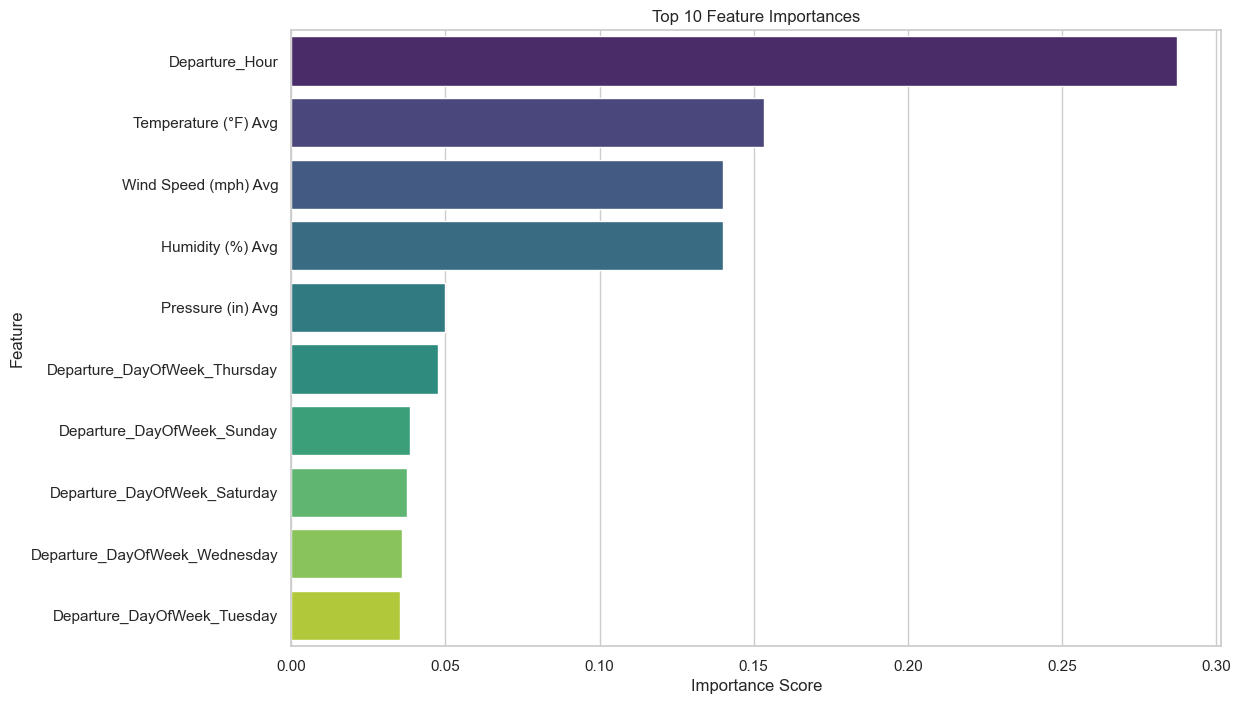

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Define feature columns and target
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# One-Hot Encode categorical variables if any (e.g., DayOfWeek)
merged_data_encoded = pd.get_dummies(merged_data, columns=['Departure_DayOfWeek'], drop_first=True)

# Update feature columns to include encoded features
feature_cols = [col for col in merged_data_encoded.columns if col in feature_cols or 'Departure_DayOfWeek_' in col]

X = merged_data_encoded[feature_cols]
y = merged_data_encoded['departure.delay_minutes']

# Initialize and train a Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [74]:
feature_importance_df

,Feature,Importance
0,Departure_Hour,0.287361
1,Temperature (°F) Avg,0.153410
3,Wind Speed (mph) Avg,0.140120
2,Humidity (%) Avg,0.140104
4,Pressure (in) Avg,0.049955
9,Departure_DayOfWeek_Thursday,0.047512
8,Departure_DayOfWeek_Sunday,0.038372
7,Departure_DayOfWeek_Saturday,0.037418
11,Departure_DayOfWeek_Wednesday,0.035875
10,Departure_DayOfWeek_Tuesday,0.035093


# Heatmap of Correlations Between All Features


C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


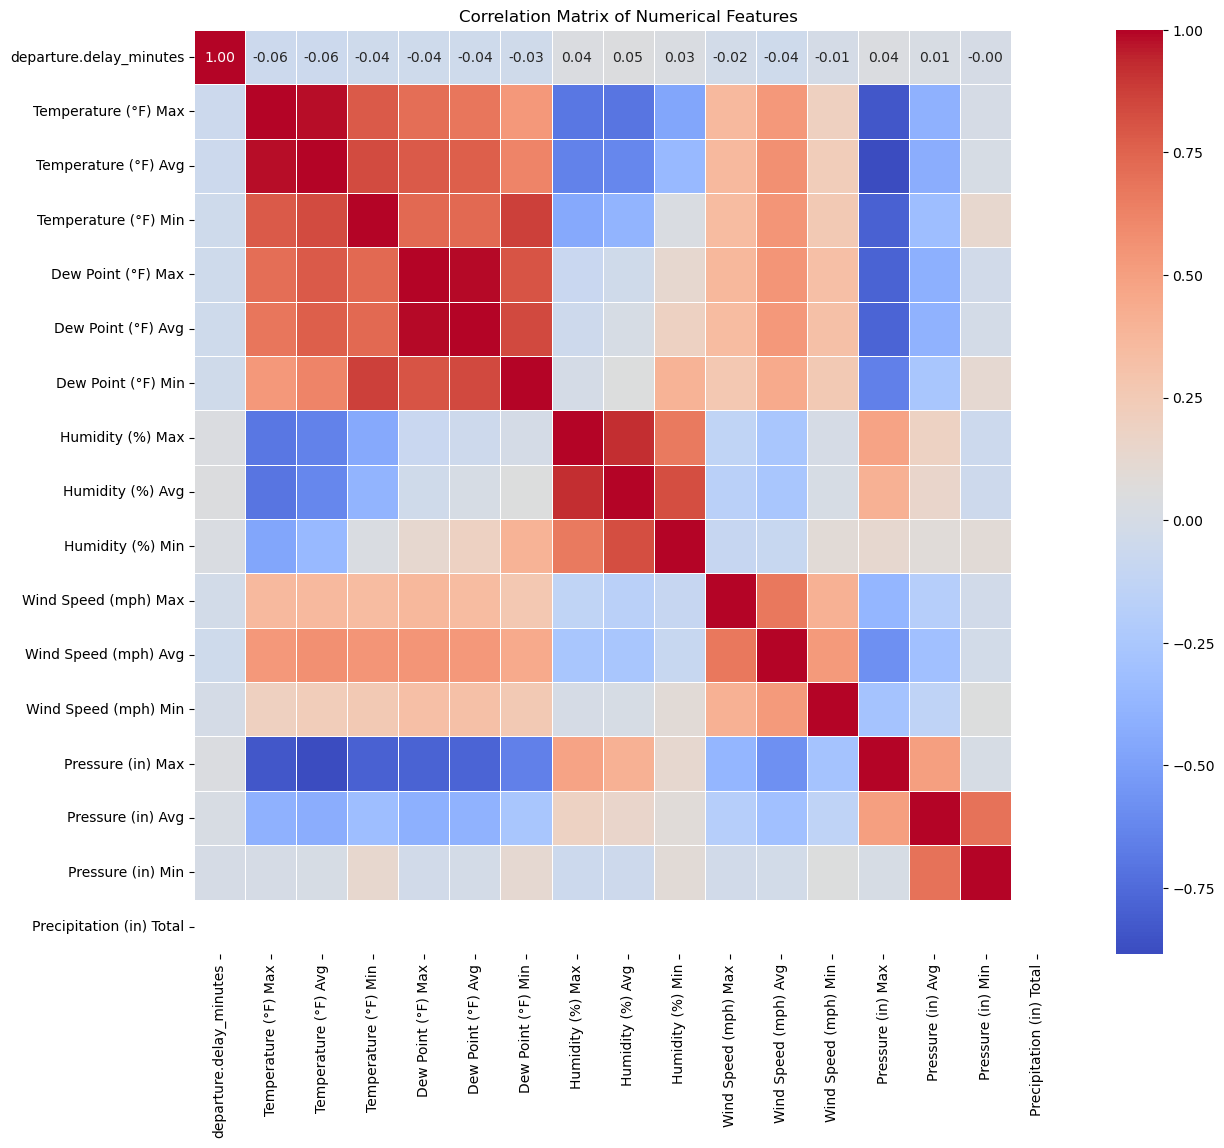

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
merged_data = pd.read_csv("merged_features_drop_cleaned_train_data.csv")

# Select numerical features
numerical_features = ['departure.delay_minutes', 'Temperature (°F) Max', 'Temperature (°F) Avg', 'Temperature (°F) Min',
                     'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min',
                     'Humidity (%) Max', 'Humidity (%) Avg', 'Humidity (%) Min',
                     'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 'Wind Speed (mph) Min',
                     'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
                     'Precipitation (in) Total']

# Calculate correlation matrix
corr_matrix_full = merged_data[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [115]:
corr_matrix_full

,departure.delay_minutes,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in) Total
departure.delay_minutes,1.000000,-0.058915,-0.059078,-0.044020,-0.041989,-0.041447,-0.031134,0.042510,0.046805,0.032568,-0.019820,-0.040838,-0.008753,0.041472,0.014560,-0.001271,NaN
Temperature (°F) Max,-0.058915,1.000000,0.984850,0.783431,0.707935,0.682442,0.531754,-0.694574,-0.707895,-0.469667,0.362621,0.530384,0.201909,-0.840067,-0.405421,0.003660,NaN
Temperature (°F) Avg,-0.059078,0.984850,1.000000,0.833672,0.783021,0.765666,0.618881,-0.644712,-0.625792,-0.350132,0.366269,0.567154,0.231465,-0.885002,-0.427209,0.011187,NaN
Temperature (°F) Min,-0.044020,0.783431,0.833672,1.000000,0.728735,0.733188,0.873268,-0.449062,-0.390898,0.034773,0.351593,0.544540,0.262931,-0.794685,-0.324095,0.131301,NaN
Dew Point (°F) Max,-0.041989,0.707935,0.783021,0.728735,1.000000,0.986120,0.807526,-0.075979,-0.034782,0.130238,0.372254,0.549205,0.323006,-0.781991,-0.406934,-0.023769,NaN
Dew Point (°F) Avg,-0.041447,0.682442,0.765666,0.733188,0.986120,1.000000,0.838585,-0.048203,0.007873,0.195164,0.349772,0.531616,0.318477,-0.775594,-0.396951,-0.016031,NaN
Dew Point (°F) Min,-0.031134,0.531754,0.618881,0.873268,0.807526,0.838585,1.000000,-0.007126,0.052737,0.401907,0.270622,0.440512,0.259553,-0.651302,-0.263790,0.117831,NaN
Humidity (%) Max,0.042510,-0.694574,-0.644712,-0.449062,-0.075979,-0.048203,-0.007126,1.000000,0.923945,0.668334,-0.128307,-0.265114,0.000858,0.479563,0.183642,-0.058042,NaN
Humidity (%) Avg,0.046805,-0.707895,-0.625792,-0.390898,-0.034782,0.007873,0.052737,0.923945,1.000000,0.824818,-0.168696,-0.266074,0.009441,0.406106,0.152269,-0.048836,NaN
Humidity (%) Min,0.032568,-0.469667,-0.350132,0.034773,0.130238,0.195164,0.401907,0.668334,0.824818,1.000000,-0.091570,-0.085723,0.090597,0.125501,0.084635,0.089788,NaN


In [80]:
corr_matrix_full

,departure.delay_minutes,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in) Total
departure.delay_minutes,1.000000,-0.058915,-0.059078,-0.044020,-0.041989,-0.041447,-0.031134,0.042510,0.046805,0.032568,-0.019820,-0.040838,-0.008753,0.041472,0.014560,-0.001271,NaN
Temperature (°F) Max,-0.058915,1.000000,0.984850,0.783431,0.707935,0.682442,0.531754,-0.694574,-0.707895,-0.469667,0.362621,0.530384,0.201909,-0.840067,-0.405421,0.003660,NaN
Temperature (°F) Avg,-0.059078,0.984850,1.000000,0.833672,0.783021,0.765666,0.618881,-0.644712,-0.625792,-0.350132,0.366269,0.567154,0.231465,-0.885002,-0.427209,0.011187,NaN
Temperature (°F) Min,-0.044020,0.783431,0.833672,1.000000,0.728735,0.733188,0.873268,-0.449062,-0.390898,0.034773,0.351593,0.544540,0.262931,-0.794685,-0.324095,0.131301,NaN
Dew Point (°F) Max,-0.041989,0.707935,0.783021,0.728735,1.000000,0.986120,0.807526,-0.075979,-0.034782,0.130238,0.372254,0.549205,0.323006,-0.781991,-0.406934,-0.023769,NaN
Dew Point (°F) Avg,-0.041447,0.682442,0.765666,0.733188,0.986120,1.000000,0.838585,-0.048203,0.007873,0.195164,0.349772,0.531616,0.318477,-0.775594,-0.396951,-0.016031,NaN
Dew Point (°F) Min,-0.031134,0.531754,0.618881,0.873268,0.807526,0.838585,1.000000,-0.007126,0.052737,0.401907,0.270622,0.440512,0.259553,-0.651302,-0.263790,0.117831,NaN
Humidity (%) Max,0.042510,-0.694574,-0.644712,-0.449062,-0.075979,-0.048203,-0.007126,1.000000,0.923945,0.668334,-0.128307,-0.265114,0.000858,0.479563,0.183642,-0.058042,NaN
Humidity (%) Avg,0.046805,-0.707895,-0.625792,-0.390898,-0.034782,0.007873,0.052737,0.923945,1.000000,0.824818,-0.168696,-0.266074,0.009441,0.406106,0.152269,-0.048836,NaN
Humidity (%) Min,0.032568,-0.469667,-0.350132,0.034773,0.130238,0.195164,0.401907,0.668334,0.824818,1.000000,-0.091570,-0.085723,0.090597,0.125501,0.084635,0.089788,NaN


C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` b

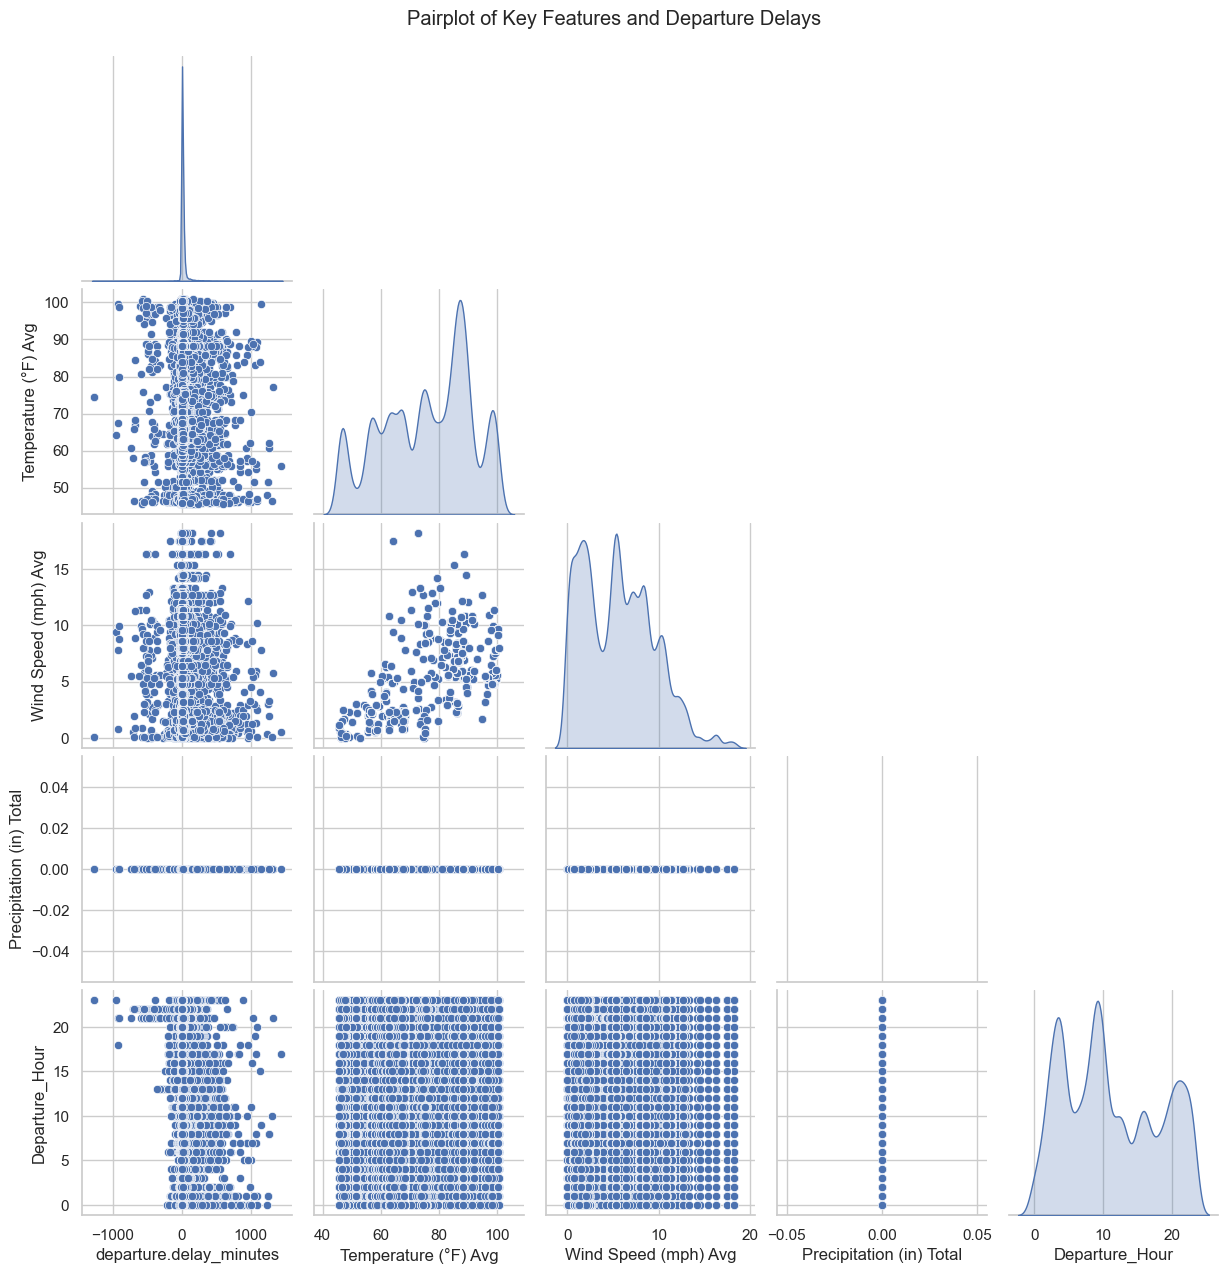

In [82]:
# Select key features for pairplot
pairplot_features = ['departure.delay_minutes', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
                    'Precipitation (in) Total', 'Departure_Hour']

sns.pairplot(merged_data[pairplot_features], diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Key Features and Departure Delays', y=1.02)
plt.show()


In [88]:
train_data['status'].unique()

array(['active', 'cancelled', 'unknown'], dtype=object)

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51871 entries, 0 to 51870
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     51871 non-null  int64  
 1   departure.iataCode         51871 non-null  object 
 2   departure.icaoCode         51871 non-null  object 
 3   departure.terminal         51871 non-null  object 
 4   departure.scheduledTime    51871 non-null  object 
 5   departure.estimatedTime    51871 non-null  object 
 6   departure.actualTime       51871 non-null  object 
 7   departure.estimatedRunway  51871 non-null  object 
 8   departure.actualRunway     51871 non-null  object 
 9   arrival.scheduledTime      51871 non-null  object 
 10  arrival.estimatedTime      51871 non-null  object 
 11  airline.iataCode           51871 non-null  object 
 12  airline.icaoCode           51871 non-null  object 
 13  flight.number              51871 non-null  int

In [15]:
test_merg=pd.read_csv('merged_features_drop_cleaned_test_data.csv')
test_merg

,status,departure.iataCode,departure.icaoCode,departure.scheduledTime,departure.estimatedRunway,departure.actualRunway,arrival.scheduledTime,arrival.estimatedTime,airline.iataCode,airline.icaoCode,...,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in) Total,Departure_Hour,departure.delay_minutes,delay_status,delay_category,airline.name,departure.day_of_week
0,0,lhe,opla,2023-07-17 20:35:00,2023-07-17 20:46:00,2023-07-17 20:46:00,2023-07-17 22:20:00,2023-07-17 22:12:00,9p,fjl,...,28.8,28.8,28.7,0.0,20,97.0,delayed,Moderate Delay,flyjinnah,0
1,0,lhe,opla,2023-07-27 08:00:00,NaN,2023-07-27 08:00:00,2023-07-27 10:00:00,NaN,pk,pia,...,28.9,28.9,28.8,0.0,8,120.0,delayed,Moderate Delay,pakistan international airlines,3
2,0,lhe,opla,2023-07-27 08:00:00,NaN,2023-07-27 08:00:00,2023-07-27 10:00:00,NaN,et,eth,...,28.9,28.9,28.8,0.0,8,120.0,delayed,Moderate Delay,ethiopian airlines,3
3,2,lhe,opla,2023-07-28 16:45:00,NaN,2023-07-28 16:45:00,2023-07-28 20:30:00,NaN,pa,abq,...,28.8,28.8,28.7,0.0,16,225.0,delayed,Long Delay,airblue,4
4,0,lhe,opla,2023-07-19 04:15:00,2023-07-19 04:18:00,2023-07-19 04:18:00,2023-07-19 06:35:00,2023-07-19 06:08:00,kl,klm,...,28.8,28.8,28.7,0.0,4,113.0,delayed,Moderate Delay,klm,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,0,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00,2023-11-23 23:27:00,2023-11-24 02:05:00,2023-11-24 01:34:00,pa,abq,...,29.2,28.6,0.0,0.0,23,139.0,delayed,Moderate Delay,airblue,3
14978,0,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00,2023-11-25 19:05:00,2023-11-25 22:05:00,2023-11-25 22:09:00,pk,pia,...,29.3,29.3,29.2,0.0,18,204.0,delayed,Long Delay,pakistan international airlines,5
14979,0,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00,2023-11-25 03:07:00,2023-11-25 05:05:00,2023-11-25 04:33:00,ba,baw,...,29.3,29.3,29.2,0.0,2,98.0,delayed,Moderate Delay,british airways,5
14980,0,lhe,opla,2023-11-27 08:35:00,NaN,2023-11-27 08:35:00,2023-11-27 10:45:00,NaN,wy,oma,...,29.3,29.3,29.2,0.0,8,130.0,delayed,Moderate Delay,oman air,0


In [17]:
test_merg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14982 entries, 0 to 14981
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     14982 non-null  int64  
 1   departure.iataCode         14982 non-null  object 
 2   departure.icaoCode         14982 non-null  object 
 3   departure.scheduledTime    14982 non-null  object 
 4   departure.estimatedRunway  8730 non-null   object 
 5   departure.actualRunway     14982 non-null  object 
 6   arrival.scheduledTime      14982 non-null  object 
 7   arrival.estimatedTime      8429 non-null   object 
 8   airline.iataCode           14976 non-null  object 
 9   airline.icaoCode           14981 non-null  object 
 10  flight.number              14982 non-null  int64  
 11  flight.iataNumber          14976 non-null  object 
 12  flight.icaoNumber          14981 non-null  object 
 13  departure.terminal         14982 non-null  obj

In [1]:
import pandas as pd

# Load the training and testing datasets
train_data = pd.read_csv('merged_features_drop_cleaned_train_data.csv')  # Replace with your actual path
test_data = pd.read_csv('merged_features_drop_cleaned_test_data.csv')  # Replace with your actual path

# List of columns in each dataset
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Identify columns exclusive to each dataset
exclusive_to_train = train_columns - test_columns
exclusive_to_test = test_columns - train_columns

print(f"Columns exclusive to Training Data ({len(exclusive_to_train)}): {exclusive_to_train}")
print(f"Columns exclusive to Testing Data ({len(exclusive_to_test)}): {exclusive_to_test}")


Columns exclusive to Training Data (2): {'departure.estimatedTime', 'departure.actualTime'}
Columns exclusive to Testing Data (0): set()


# 2. Handling Missing Values
Objective: Address missing data to prevent skewed analyses and ensure data quality for modeling.

Overview:
Identify Missing Data: Quantify and visualize missing values.
Handle Missing Data: Decide on imputation, removal, or other strategies based on the context.

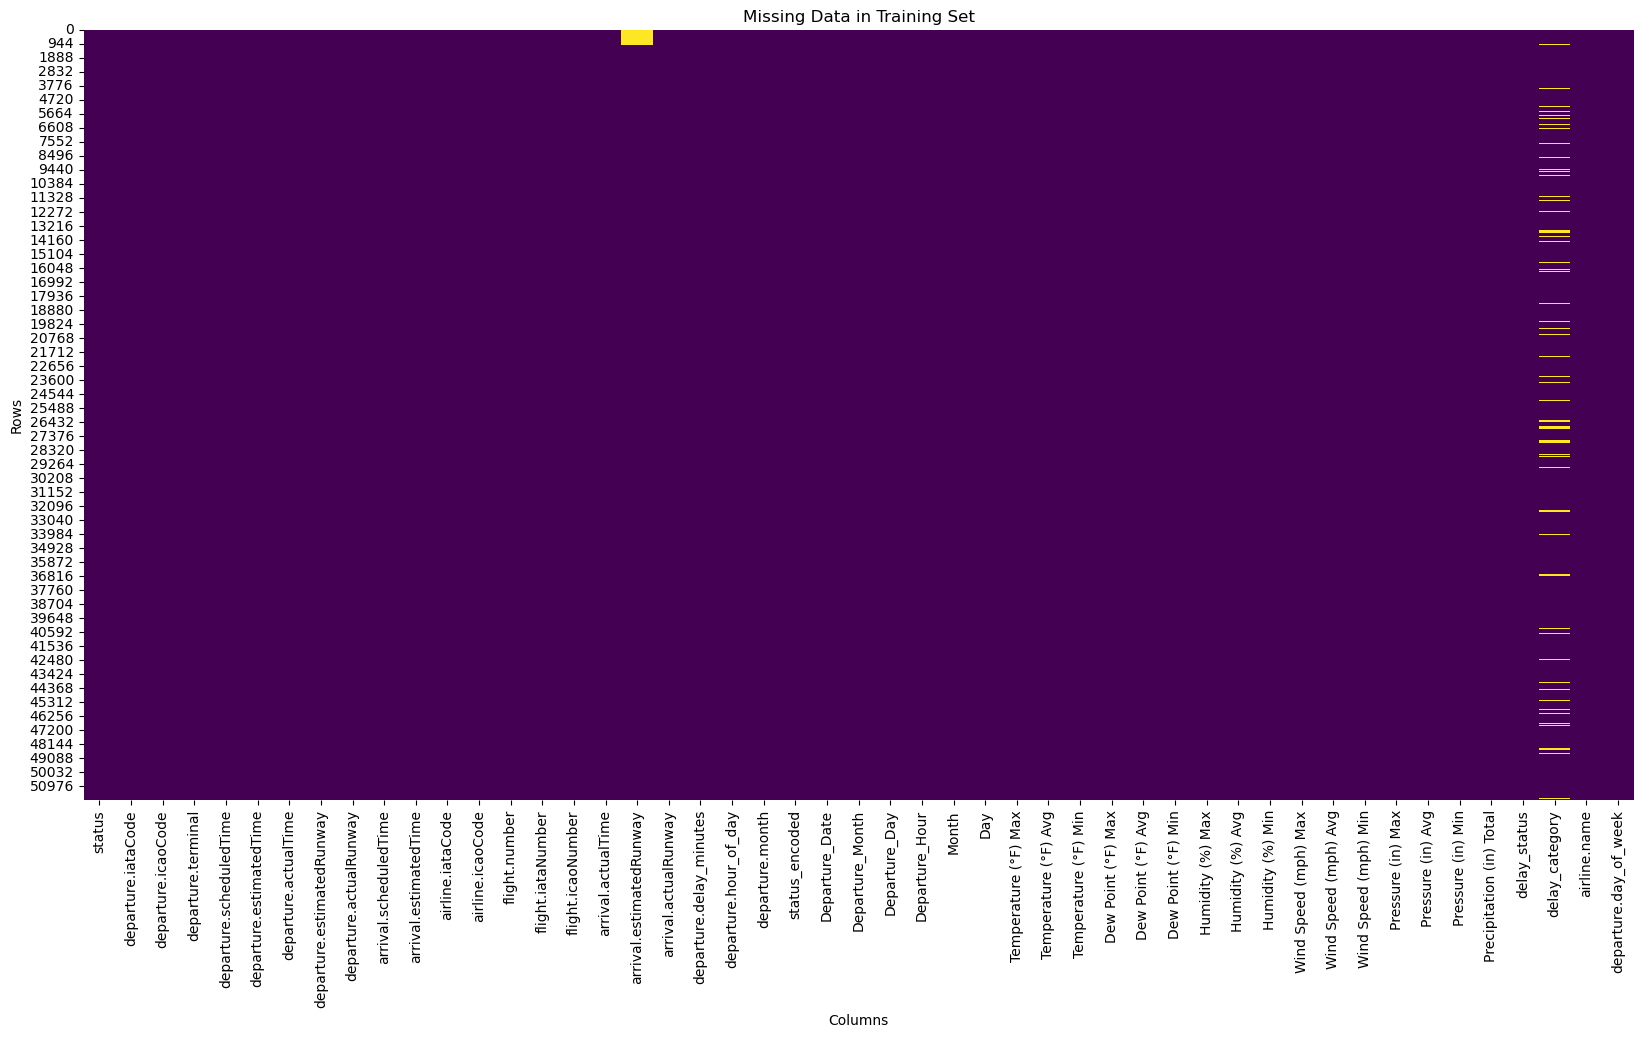

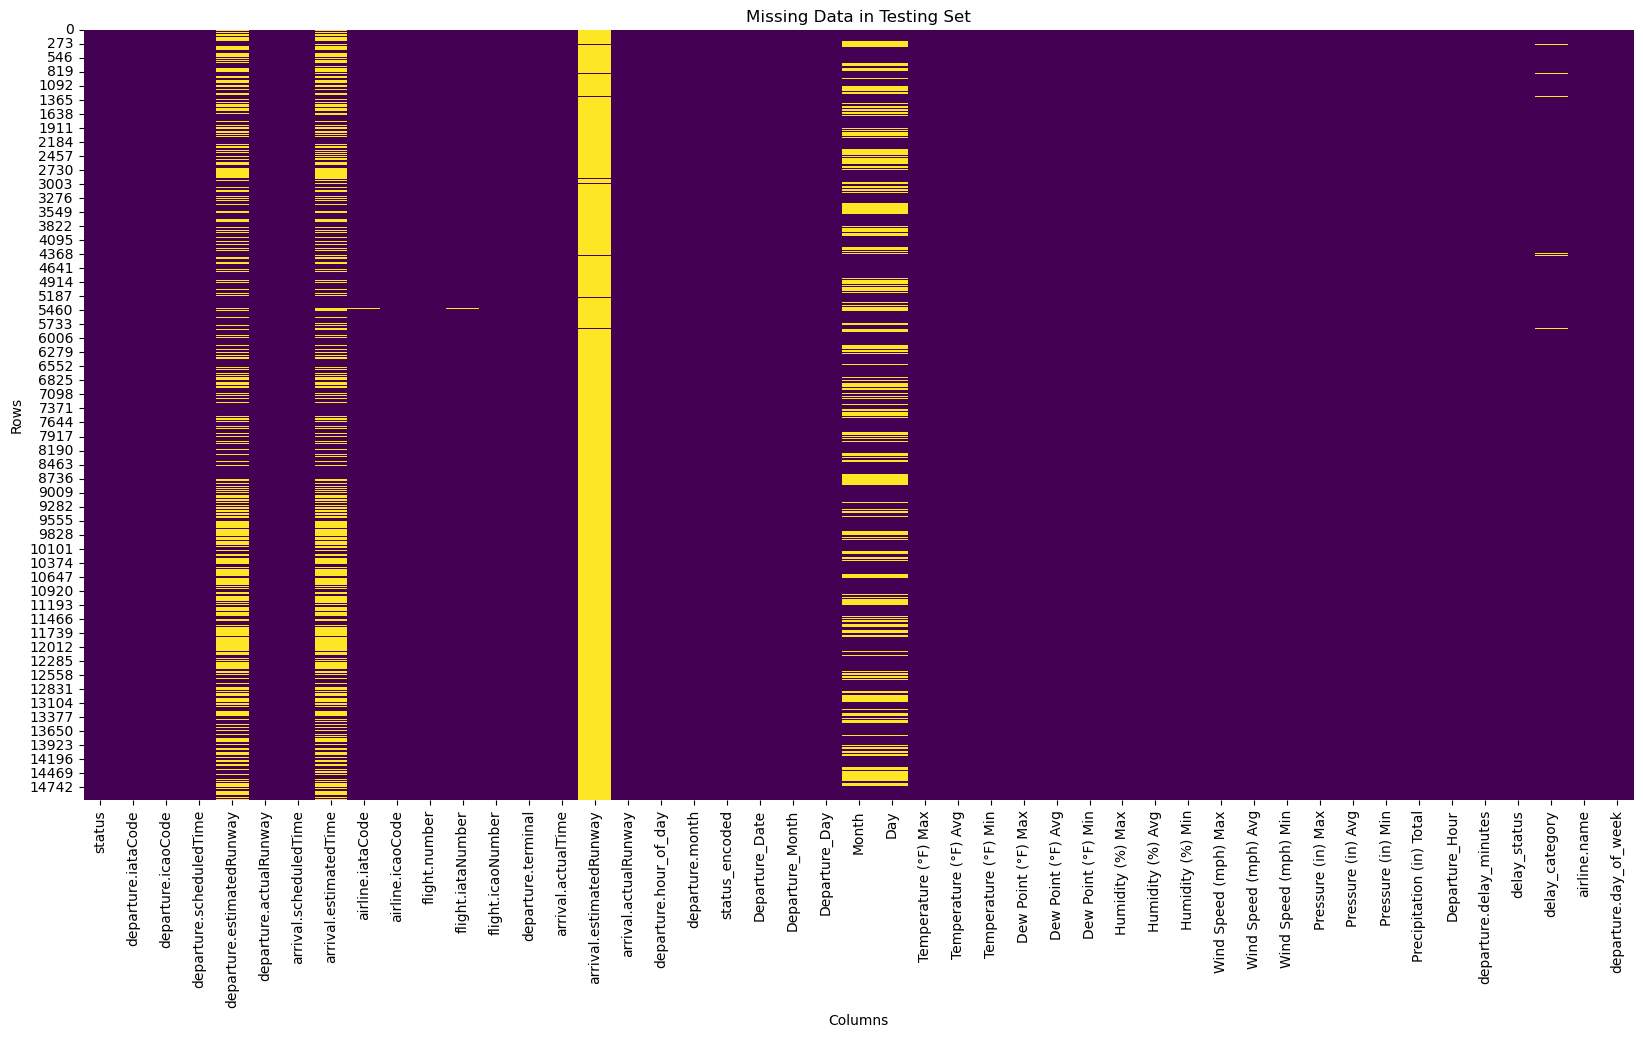

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize missing data
def visualize_missing_data(df, title):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Visualize missing data in Training Set
visualize_missing_data(train_data, 'Missing Data in Training Set')

# Visualize missing data in Testing Set
visualize_missing_data(test_data, 'Missing Data in Testing Set')


#  Detailed Handling:
a. Analyzing Missing Data Patterns


Missing Data Summary for Training Set:
                                          Column  Missing_Count  \
delay_category                    delay_category           4488   
arrival.estimatedRunway  arrival.estimatedRunway           1028   

                         Missing_Percent  
delay_category                  8.652233  
arrival.estimatedRunway         1.981840  


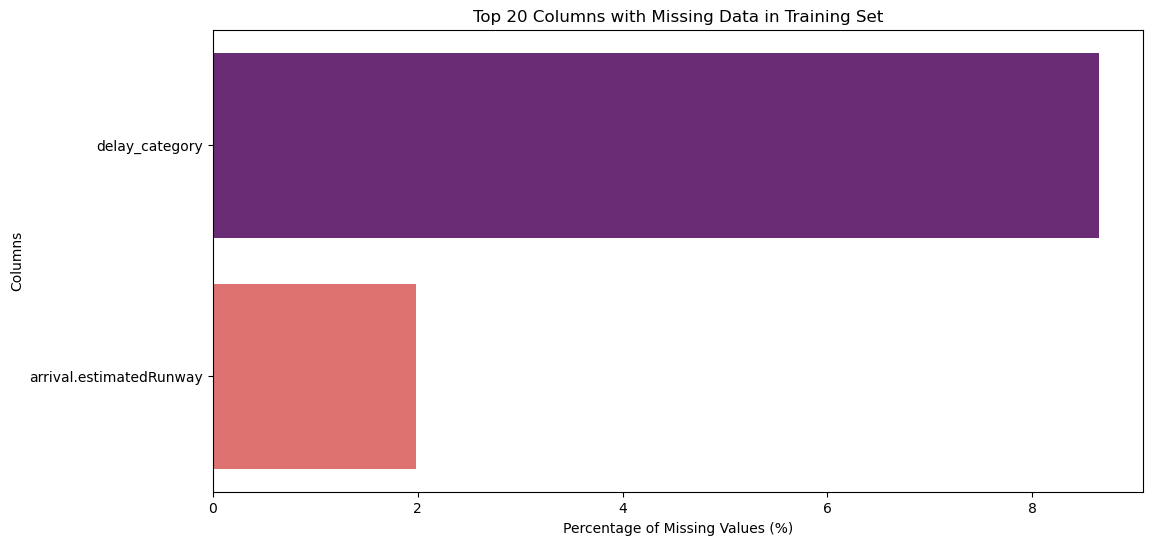


Missing Data Summary for Testing Set:
                                              Column  Missing_Count  \
arrival.estimatedRunway      arrival.estimatedRunway          14907   
arrival.estimatedTime          arrival.estimatedTime           6553   
departure.estimatedRunway  departure.estimatedRunway           6252   
Month                                          Month           4622   
Day                                              Day           4622   
delay_category                        delay_category             60   
flight.iataNumber                  flight.iataNumber              6   
airline.iataCode                    airline.iataCode              6   
airline.icaoCode                    airline.icaoCode              1   
flight.icaoNumber                  flight.icaoNumber              1   

                           Missing_Percent  
arrival.estimatedRunway          99.499399  
arrival.estimatedTime            43.739154  
departure.estimatedRunway        41.730076  

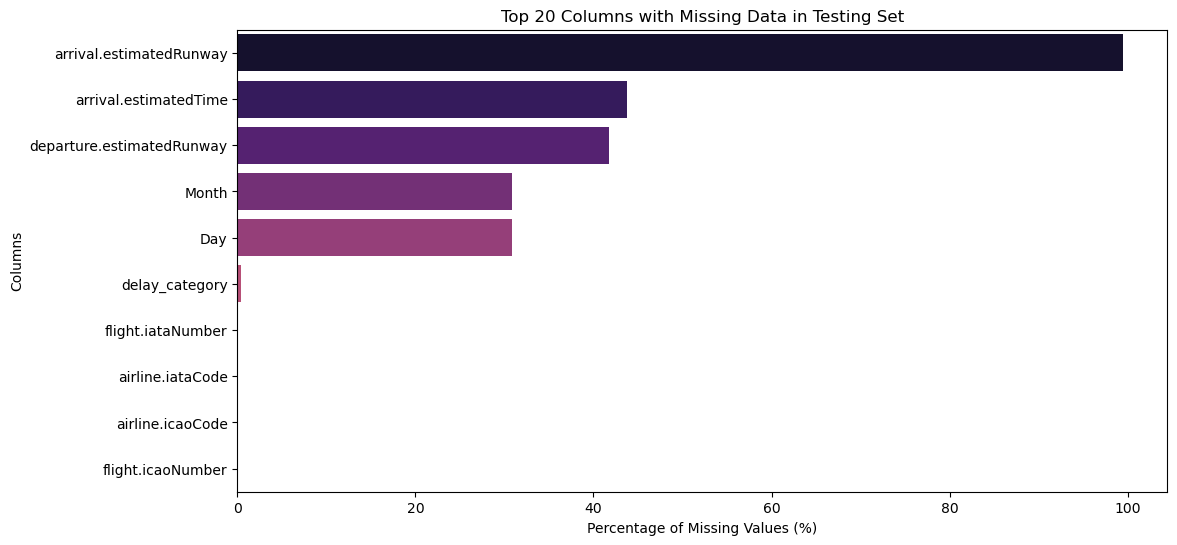

In [5]:
# Summary of missing values
def missing_summary(df, dataset_name):
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_counts,
        'Missing_Percent': missing_percent
    }).sort_values(by='Missing_Percent', ascending=False)
    
    print(f"\nMissing Data Summary for {dataset_name}:")
    print(missing_df[missing_df['Missing_Count'] > 0].head(20))  # Display top 20
    
    # Plot missing data percentage
    plt.figure(figsize=(12,6))
    sns.barplot(x='Missing_Percent', y='Column', data=missing_df[missing_df['Missing_Count'] > 0].head(20), palette='magma')
    plt.title(f'Top 20 Columns with Missing Data in {dataset_name}')
    plt.xlabel('Percentage of Missing Values (%)')
    plt.ylabel('Columns')
    plt.show()

# Missing data summary for Training and Testing sets
missing_summary(train_data, 'Training Set')
missing_summary(test_data, 'Testing Set')


# b. Strategies to Handle Missing Data
Imputation for Numerical Columns:

Mean or Median Imputation:

In [26]:
# For Training Set
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# For Testing Set
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].median())


# Interpolation (if data is time-series):



In [ ]:
# Assuming 'Departure_Date' is datetime
train_data['Departure_Date'] = pd.to_datetime(train_data['Departure_Date'], errors='coerce')
train_data.set_index('Departure_Date', inplace=True)
train_data.interpolate(method='time', inplace=True)
train_data.reset_index(inplace=True)

# Similarly for Testing Set
test_data['Departure_Date'] = pd.to_datetime(test_data['Departure_Date'], errors='coerce')
test_data.set_index('Departure_Date', inplace=True)
test_data.interpolate(method='time', inplace=True)
test_data.reset_index(inplace=True)


In [ ]:
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])


In [37]:
# Verify no missing values remain
print("Training Set Missing Values:")
print(train_data.isnull().sum().sum())  # Total missing values

print("\nTesting Set Missing Values:")
print(test_data.isnull().sum().sum())  # Total missing values


Training Set Missing Values:
0

Testing Set Missing Values:
32408


In [41]:
# Convert 'Departure_Date' to datetime if not already
#train_data['Departure_Date'] = pd.to_datetime(train_data['Departure_Date'], errors='coerce')
test_data['Departure_Date'] = pd.to_datetime(test_data['Departure_Date'], errors='coerce')

# Extract week number
#train_data['Week_of_Year'] = train_data['Departure_Date'].dt.isocalendar().week
test_data['Week_of_Year'] = test_data['Departure_Date'].dt.isocalendar().week


C:\Users\hussain\AppData\Local\Temp\ipykernel_11340\3072104774.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Departure_Date'] = pd.to_datetime(test_data['Departure_Date'], errors='coerce')


In [43]:
test_data

,status,departure.iataCode,departure.icaoCode,departure.scheduledTime,departure.estimatedRunway,departure.actualRunway,arrival.scheduledTime,arrival.estimatedTime,airline.iataCode,airline.icaoCode,flight.number,flight.iataNumber,flight.icaoNumber,departure.terminal,arrival.actualTime,arrival.estimatedRunway,arrival.actualRunway,departure.hour_of_day,departure.month,status_encoded,Departure_Date,Departure_Month,Departure_Day,Month,Day,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in) Total,Departure_Hour,departure.delay_minutes,delay_status,delay_category,airline.name,departure.day_of_week,Week_of_Year
0,0,lhe,opla,2023-07-17 20:35:00,2023-07-17 20:46:00,2023-07-17 20:46:00,2023-07-17 22:20:00,2023-07-17 22:12:00,9p,fjl,847,9p847,fjl847,Unknown,2023-07-17 22:12:00,NaN,2023-07-17 22:20:00,20,7,0,NaT,Jul,17,Jul,17.0,95.0,88.6,82.0,81.0,78.1,75.0,89.0,71.3,59.0,12.0,6.9,0.0,28.8,28.8,28.7,0.0,20,97.0,delayed,Moderate Delay,flyjinnah,0,<NA>
1,0,lhe,opla,2023-07-27 08:00:00,NaN,2023-07-27 08:00:00,2023-07-27 10:00:00,NaN,pk,pia,725,pk725,pia725,m,2023-07-27 10:00:00,NaN,2023-07-27 10:00:00,8,7,0,NaT,Jul,27,Jul,27.0,88.0,82.9,75.0,79.0,77.1,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8,0.0,8,120.0,delayed,Moderate Delay,pakistan international airlines,3,<NA>
2,0,lhe,opla,2023-07-27 08:00:00,NaN,2023-07-27 08:00:00,2023-07-27 10:00:00,NaN,et,eth,4359,et4359,eth4359,m,2023-07-27 10:00:00,NaN,2023-07-27 10:00:00,8,7,0,NaT,Jul,27,Jul,27.0,88.0,82.9,75.0,79.0,77.1,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8,0.0,8,120.0,delayed,Moderate Delay,ethiopian airlines,3,<NA>
3,2,lhe,opla,2023-07-28 16:45:00,NaN,2023-07-28 16:45:00,2023-07-28 20:30:00,NaN,pa,abq,470,pa470,abq470,m,2023-07-28 20:30:00,NaN,2023-07-28 20:30:00,16,7,2,NaT,Jul,28,Jul,28.0,93.0,86.3,81.0,79.0,76.7,75.0,89.0,73.8,59.0,13.0,7.4,0.0,28.8,28.8,28.7,0.0,16,225.0,delayed,Long Delay,airblue,4,<NA>
4,0,lhe,opla,2023-07-19 04:15:00,2023-07-19 04:18:00,2023-07-19 04:18:00,2023-07-19 06:35:00,2023-07-19 06:08:00,kl,klm,3932,kl3932,klm3932,m,2023-07-19 06:08:00,NaN,2023-07-19 06:35:00,4,7,0,NaT,Jul,19,Jul,19.0,90.0,84.4,81.0,81.0,79.8,77.0,100.0,85.3,75.0,23.0,11.3,0.0,28.8,28.8,28.7,0.0,4,113.0,delayed,Moderate Delay,klm,2,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,0,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00,2023-11-23 23:27:00,2023-11-24 02:05:00,2023-11-24 01:34:00,pa,abq,412,pa412,abq412,m,2023-11-24 01:34:00,NaN,2023-11-24 02:05:00,23,11,0,NaT,Nov,23,Nov,23.0,75.0,63.0,0.0,57.0,52.9,0.0,88.0,69.3,0.0,6.0,0.7,0.0,29.2,28.6,0.0,0.0,23,139.0,delayed,Moderate Delay,airblue,3,<NA>
14978,0,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00,2023-11-25 19:05:00,2023-11-25 22:05:00,2023-11-25 22:09:00,pk,pia,859,pk859,pia859,m,2023-11-25 22:09:00,NaN,2023-11-25 22:05:00,18,11,0,NaT,Nov,25,Nov,25.0,73.0,63.0,54.0,54.0,52.2,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2,0.0,18,204.0,delayed,Long Delay,pakistan international airlines,5,<NA>
14979,0,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00,2023-11-25 03:07:00,2023-11-25 05:05:00,2023-11-25 04:33:00,ba,baw,6187,ba6187,baw6187,m,2023-11-25 04:33:00,NaN,2023-11-25 05:05:00,2,11,0,NaT,Nov,25,Nov,25.0,73.0,63.0,54.0,54.0,52.2,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2,0.0,2,98.0,delayed,Moderate Delay,british airways,5,<NA>
14980,0,lhe,opla,2023-11-27 08:35:00,NaN,2023-11-27 08:35:00,2023-11-27 10:45:00,NaN,wy,oma,6032,wy6032,oma6032,m,2023-11-27 10:45:00,NaN,2023-11-27 10:45:00,8,11,0,NaT,Nov,27,Nov,27.0,70.0,62.7,55.0,55.0,54.3,52.0,88.0,74.4,60.0,12.0,2.3,0.0,29.3,29.3,29.2,0.0,8,130.0,delayed,Moderate D

In [49]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51871 entries, NaT to NaT
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     51871 non-null  int64  
 1   departure.iataCode         51871 non-null  object 
 2   departure.icaoCode         51871 non-null  object 
 3   departure.terminal         51871 non-null  object 
 4   departure.scheduledTime    51871 non-null  object 
 5   departure.estimatedTime    51871 non-null  object 
 6   departure.actualTime       51871 non-null  object 
 7   departure.estimatedRunway  51871 non-null  object 
 8   departure.actualRunway     51871 non-null  object 
 9   arrival.scheduledTime      51871 non-null  object 
 10  arrival.estimatedTime      51871 non-null  object 
 11  airline.iataCode           51871 non-null  object 
 12  airline.icaoCode           51871 non-null  object 
 13  flight.number              51871 non-null  

In [9]:
# Drop exclusive columns from the training set
train_data = train_data.drop(columns=['departure.actualTime', 'departure.estimatedTime'], errors='ignore')

# Drop 'Departure_Date' and 'Week_of_Year' from both datasets as they are not usable
train_data = train_data.drop(columns=['Departure_Date', 'Week_of_Year'], errors='ignore')
test_data = test_data.drop(columns=['Departure_Date', 'Week_of_Year'], errors='ignore')


In [11]:
# Get list of columns for both datasets
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Identify columns exclusive to each dataset
exclusive_to_train = train_columns - test_columns
exclusive_to_test = test_columns - train_columns

print(f"Columns exclusive to Training Data ({len(exclusive_to_train)}): {exclusive_to_train}")
print(f"Columns exclusive to Testing Data ({len(exclusive_to_test)}): {exclusive_to_test}")


Columns exclusive to Training Data (0): set()
Columns exclusive to Testing Data (0): set()


In [13]:
# Calculate the mode of 'delay_category'
delay_category_mode = train_data['delay_category'].mode()[0]

# Fill missing values with the mode
train_data['delay_category'] = train_data['delay_category'].fillna(delay_category_mode)


In [15]:
# Calculate the mode of 'arrival.estimatedRunway'
arrival_estimatedRunway_mode = train_data['arrival.estimatedRunway'].mode()[0]

# Fill missing values with the mode
train_data['arrival.estimatedRunway'] = train_data['arrival.estimatedRunway'].fillna(arrival_estimatedRunway_mode)


In [17]:
test_data = test_data.drop(columns=['arrival.estimatedRunway'], errors='ignore')


In [19]:
# Fill 'Month' with mode
month_mode = test_data['Month'].mode()[0]
test_data['Month'] = test_data['Month'].fillna(month_mode)

# Fill 'Day' with median
day_median = test_data['Day'].median()
test_data['Day'] = test_data['Day'].fillna(day_median)


In [21]:
delay_category_mode_test = test_data['delay_category'].mode()[0]
test_data['delay_category'] = test_data['delay_category'].fillna(delay_category_mode_test)


In [23]:
# Identify categorical columns
categorical_cols_test = test_data.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_cols_test:
    if test_data[col].isnull().sum() > 0:
        mode_val = test_data[col].mode()[0]
        test_data[col] = test_data[col].fillna(mode_val)


In [25]:
# Example: Fill missing 'airline.iataCode' with 'Unknown'
test_data['airline.iataCode'] = test_data['airline.iataCode'].fillna('Unknown')


In [27]:
# Verify no missing values remain in Training Set
print("Training Set Missing Values:")
print(train_data.isnull().sum().sum())  # Should be 0

# Verify no missing values remain in Testing Set
print("\nTesting Set Missing Values:")
print(test_data.isnull().sum().sum())  # Should be 0 or minimal if any


Training Set Missing Values:
0

Testing Set Missing Values:
0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for the training set
corr_matrix = train_data.corr()

# Select correlations with the target variable
target_corr = corr_matrix['departure.delay_minutes'].sort_values(ascending=False)

# Display top 10 positively correlated features
print("Top 10 Features Positively Correlated with Departure Delay:")
print(target_corr.head(11))  # Including self-correlation

# Display top 10 negatively correlated features
print("\nTop 10 Features Negatively Correlated with Departure Delay:")
print(target_corr.tail(10))

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.head(10).values[1:], y=target_corr.head(10).index[1:], palette='Blues_d')
plt.title('Top 10 Features Positively Correlated with Departure Delay')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.tail(10).values, y=target_corr.tail(10).index, palette='Reds_d')
plt.title('Top 10 Features Negatively Correlated with Departure Delay')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


ValueError: could not convert string to float: 'lhe'

C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


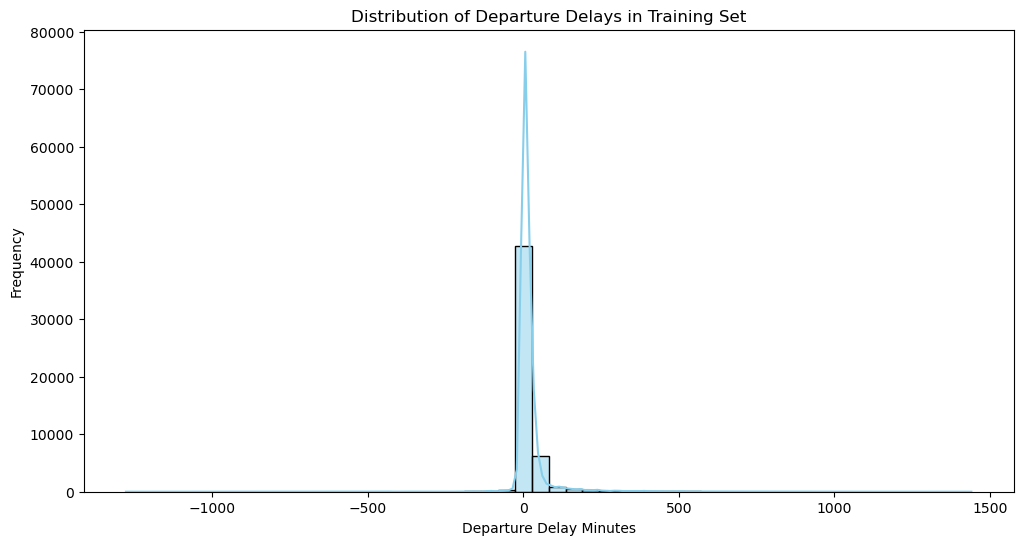

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['departure.delay_minutes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delays in Training Set')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')
plt.show()


C:\Users\hussain\AppData\Local\Temp\ipykernel_12076\2821265623.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_data, x='departure.hour_of_day', y='departure.delay_minutes', ci=None, color='purple')
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


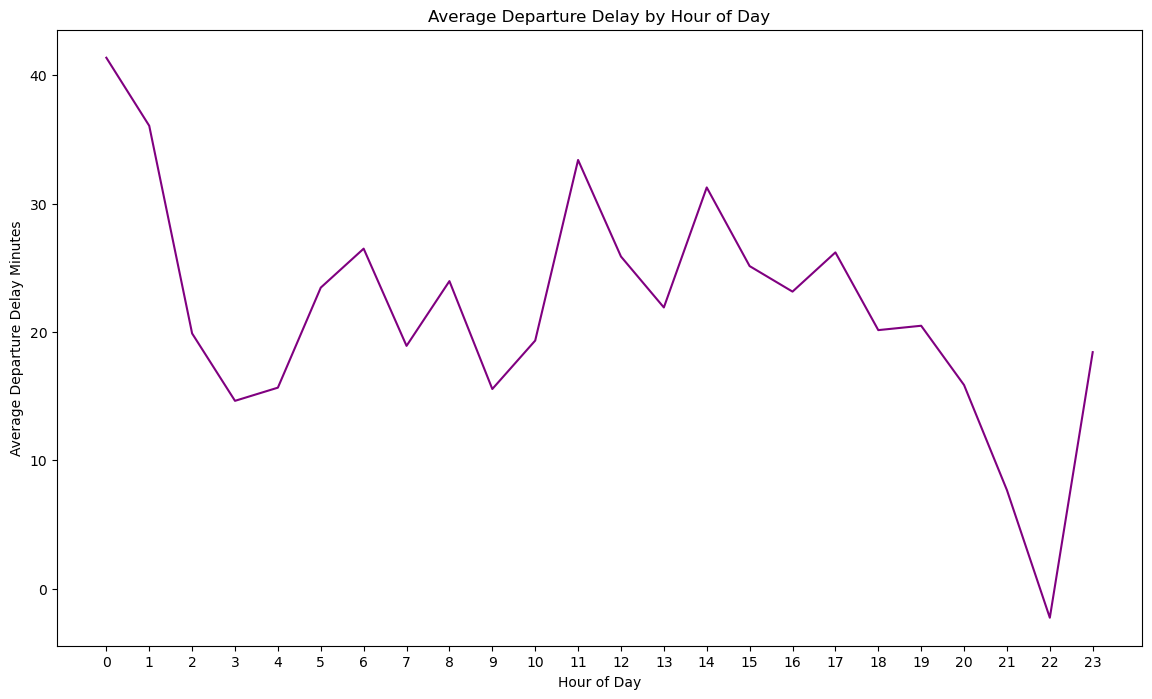

In [33]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=train_data, x='departure.hour_of_day', y='departure.delay_minutes', ci=None, color='purple')
plt.title('Average Departure Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Departure Delay Minutes')
plt.xticks(range(0, 24))
plt.show()


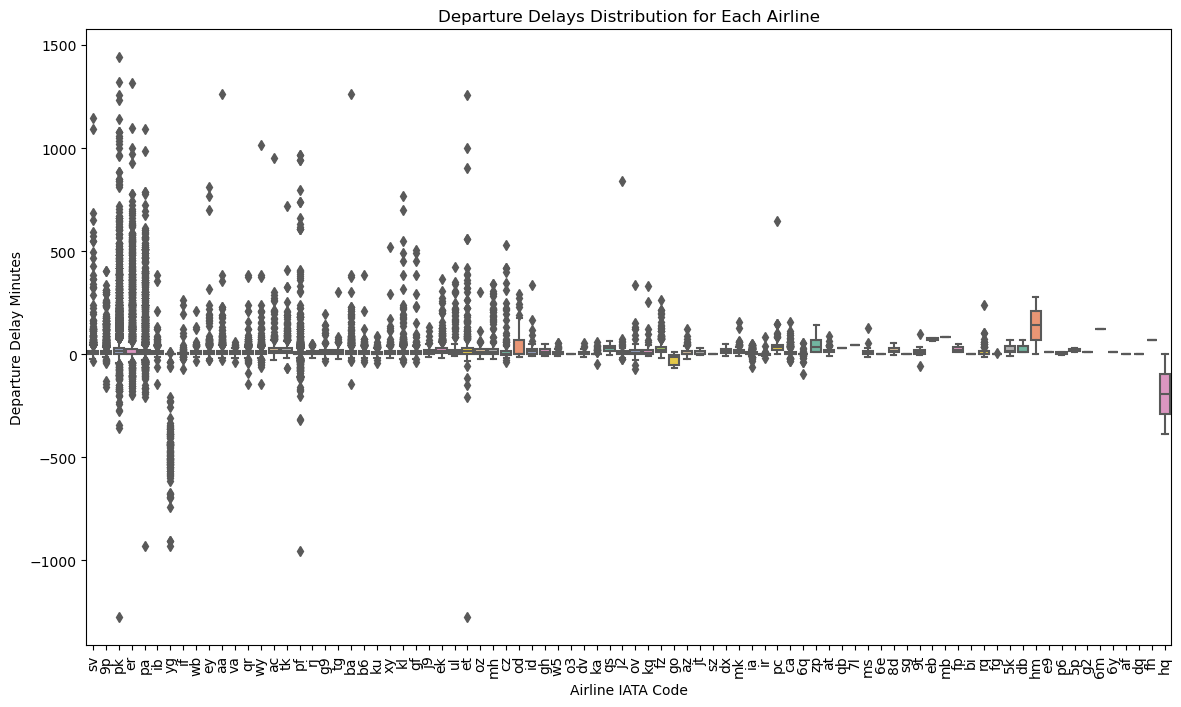

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='airline.iataCode', y='departure.delay_minutes', data=train_data, palette='Set2')
plt.title('Departure Delays Distribution for Each Airline')
plt.xlabel('Airline IATA Code')
plt.ylabel('Departure Delay Minutes')
plt.xticks(rotation=90)
plt.show()


C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hussain\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 3.1583624920952498] is not finite

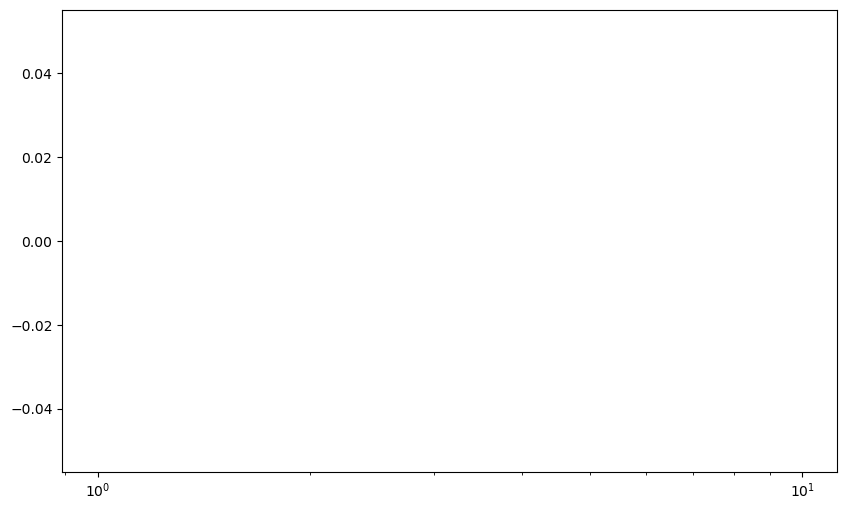

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_data['departure.delay_minutes'], bins=100, kde=True, log_scale=True) 
plt.title('Distribution of Departure Delays (Log Scale)')
plt.xlabel('Delay Minutes (Log Scale)')
plt.ylabel('Frequency')
plt.show()

C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


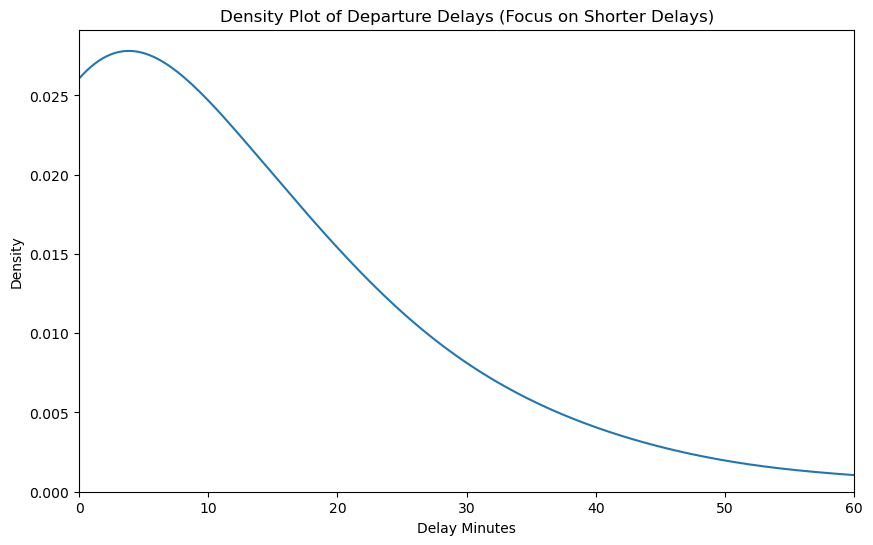

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data['departure.delay_minutes'], clip=(0, 60)) 
plt.title('Density Plot of Departure Delays (Focus on Shorter Delays)')
plt.xlabel('Delay Minutes')
plt.ylabel('Density')
plt.xlim(0, 60)  # Focus on delays up to 60 minutes
plt.show()

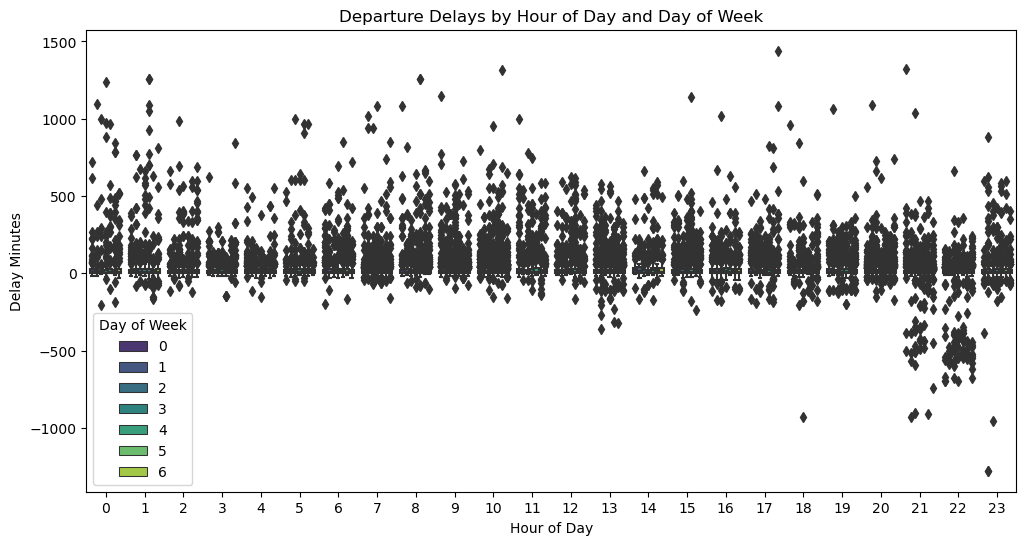

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='departure.hour_of_day', y='departure.delay_minutes', hue='departure.day_of_week', data=train_data, palette='viridis')
plt.title('Departure Delays by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Delay Minutes')
plt.legend(title='Day of Week')
plt.show()

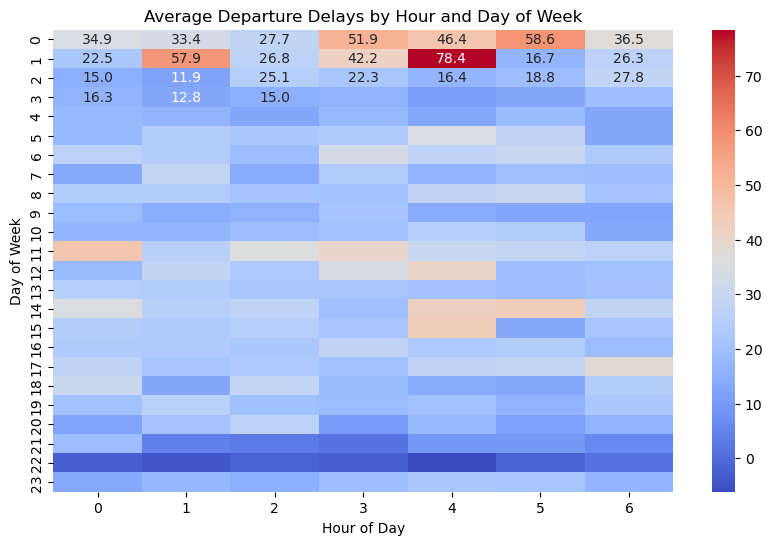

In [69]:
# Create a pivot table to calculate average delays for each hour and day of the week
delay_by_hour_day = train_data.groupby(['departure.hour_of_day', 'departure.day_of_week'])['departure.delay_minutes'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(delay_by_hour_day, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Average Departure Delays by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

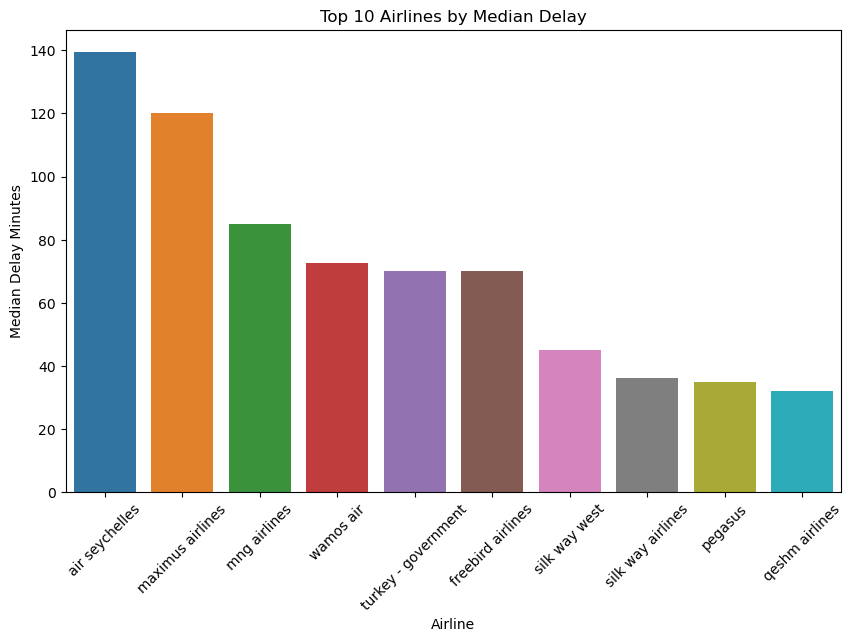

In [71]:
top_airlines = train_data.groupby('airline.name')['departure.delay_minutes'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.title('Top 10 Airlines by Median Delay')
plt.xlabel('Airline')
plt.ylabel('Median Delay Minutes')
plt.xticks(rotation=45)
plt.show()

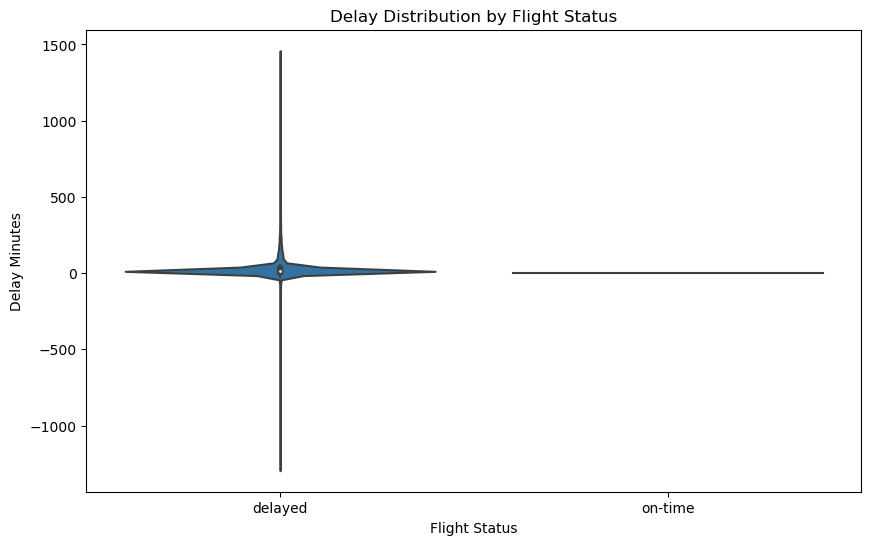

In [73]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='delay_status', y='departure.delay_minutes', data=train_data)
plt.title('Delay Distribution by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Delay Minutes')
plt.show()

C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

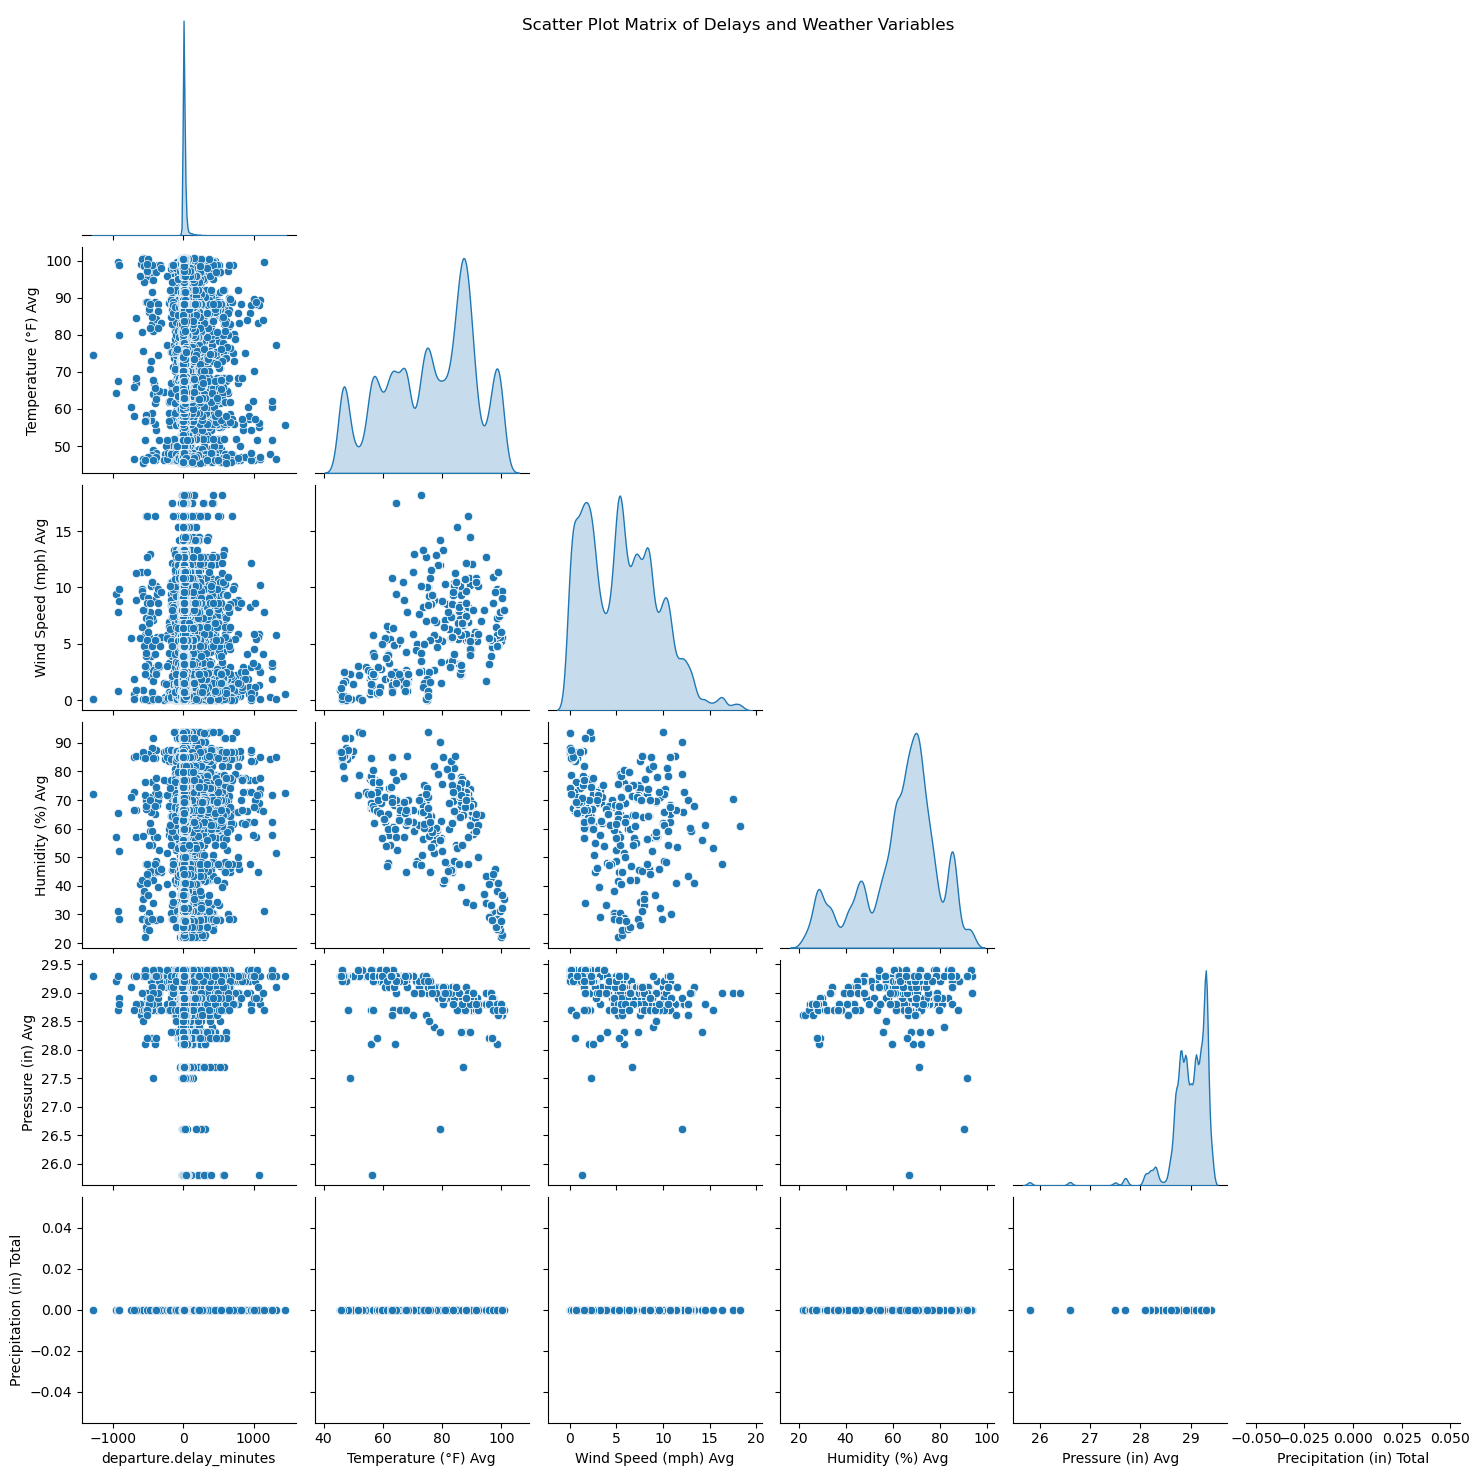

In [75]:
weather_vars = ['Temperature (°F) Avg', 'Wind Speed (mph) Avg', 'Humidity (%) Avg', 'Pressure (in) Avg', 'Precipitation (in) Total']
sns.pairplot(train_data[['departure.delay_minutes'] + weather_vars], diag_kind='kde', corner=True)
plt.suptitle('Scatter Plot Matrix of Delays and Weather Variables')
plt.show()

C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


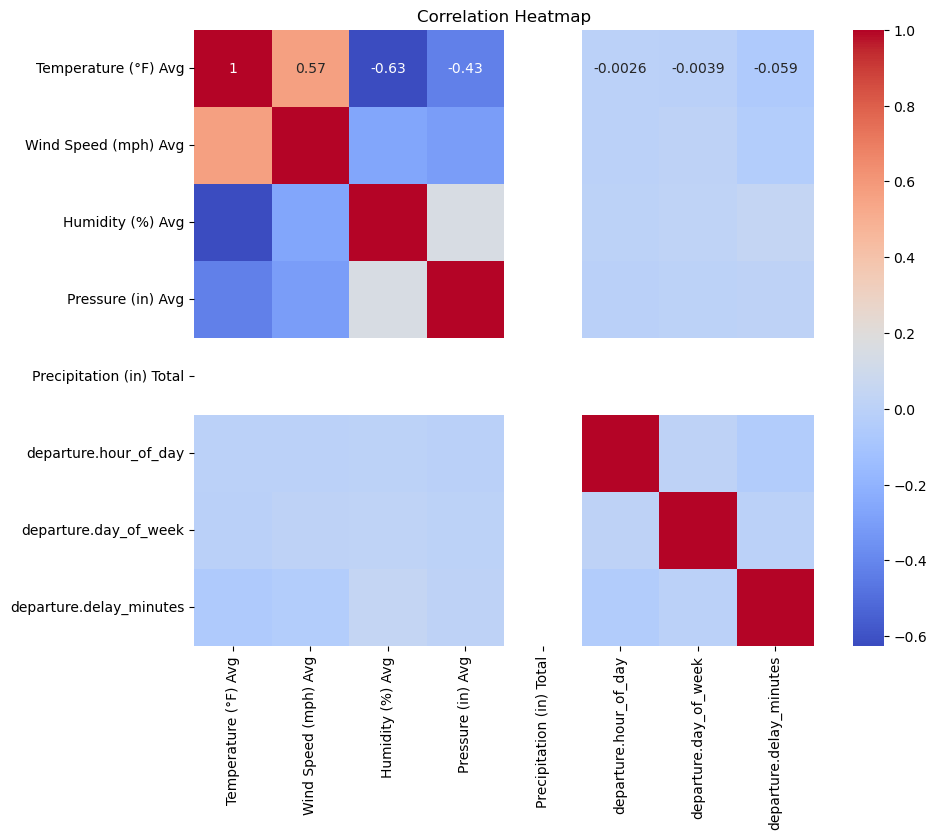

In [77]:
corr_vars = weather_vars + ['departure.hour_of_day', 'departure.day_of_week']
corr_matrix = train_data[corr_vars + ['departure.delay_minutes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


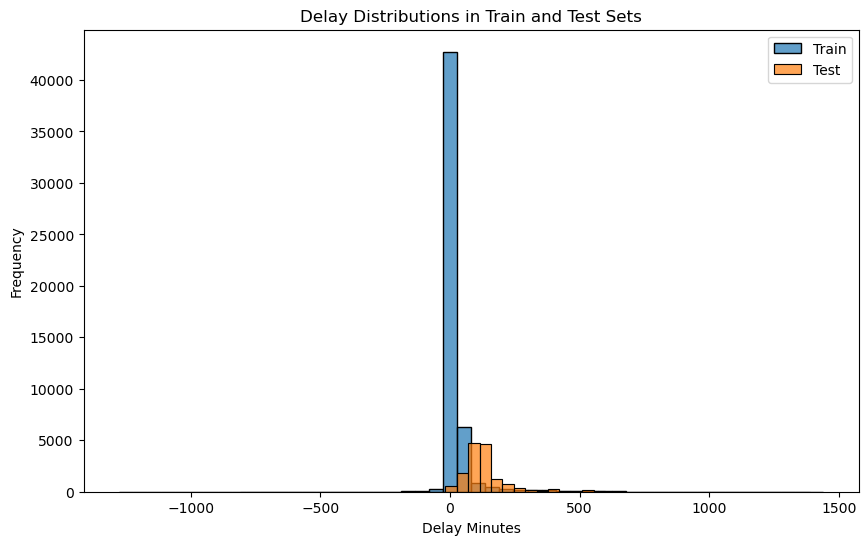

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['departure.delay_minutes'], bins=50, label='Train', alpha=0.7)
sns.histplot(test_data['departure.delay_minutes'], bins=50, label='Test', alpha=0.7)
plt.legend()
plt.title('Delay Distributions in Train and Test Sets')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.show()

In [81]:
print("Training Data Statistics:")
print(train_data['departure.delay_minutes'].describe())
print("\nTest Data Statistics:")
print(test_data['departure.delay_minutes'].describe())

Training Data Statistics:
count    51871.000000
mean        19.425671
std         67.203683
min      -1277.000000
25%          0.000000
50%          8.000000
75%         20.000000
max       1440.000000
Name: departure.delay_minutes, dtype: float64

Test Data Statistics:
count    14982.000000
mean       133.286210
std         92.576909
min       -810.000000
25%         86.000000
50%        115.000000
75%        149.000000
max       1390.000000
Name: departure.delay_minutes, dtype: float64


# Empirical Cumulative Distribution Function (ECDF):
The ECDF shows the proportion of delays less than or equal to a given value. This is helpful for comparing distributions and identifying differences in the tails.

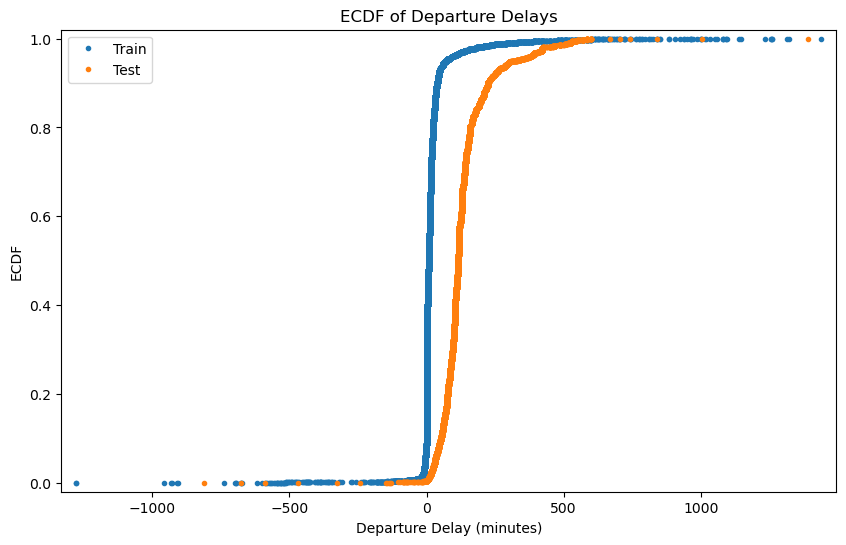

In [83]:
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_train, y_train = ecdf(train_data['departure.delay_minutes'])
x_test, y_test = ecdf(test_data['departure.delay_minutes'])

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, marker='.', linestyle='none', label='Train')
plt.plot(x_test, y_test, marker='.', linestyle='none', label='Test')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('ECDF')
plt.title('ECDF of Departure Delays')
plt.legend()
plt.margins(0.02)
plt.show()

# Circular Plot for Hour of Day Delays:

This plot is effective for visualizing cyclical data like time of day, clearly showing peak delay times.


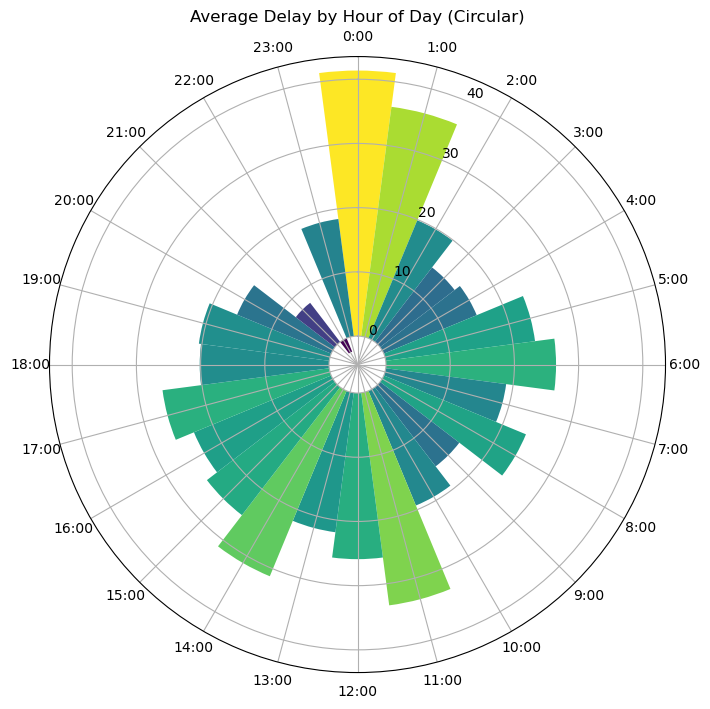

In [89]:
import matplotlib.cm as cm

hourly_delays = train_data.groupby('departure.hour_of_day')['departure.delay_minutes'].mean()

theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
radii = hourly_delays.values

fig, ax = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=(8,8))

bars = ax.bar(theta, radii, width=(2*np.pi/24), bottom=0.0, color=cm.viridis(radii/radii.max()))

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_xticks(theta)
ax.set_xticklabels([f"{i}:00" for i in range(24)])
ax.set_title("Average Delay by Hour of Day (Circular)")
plt.show()

# Bubble Plot of Weather and Delays:
This adds a third dimension (bubble size representing wind speed) to a scatter plot, showing the combined effect of temperature and wind on delays.


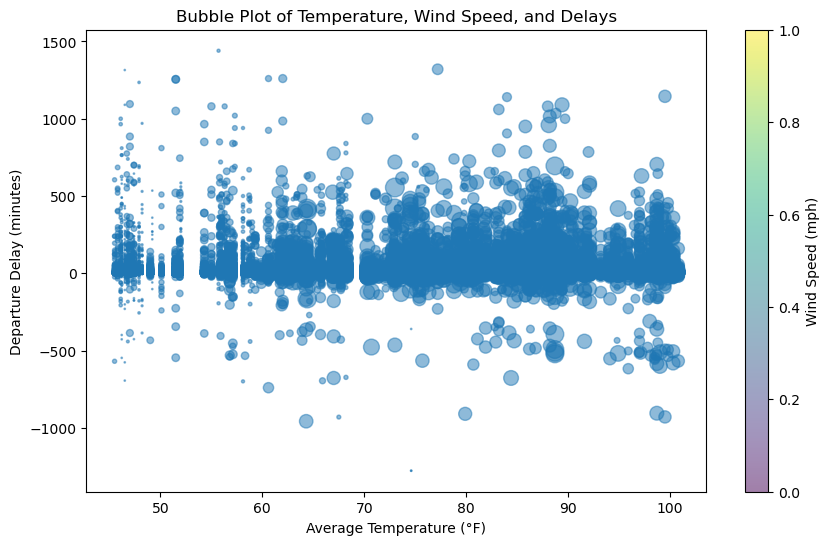

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Temperature (°F) Avg'], train_data['departure.delay_minutes'], s=train_data['Wind Speed (mph) Avg']*10, alpha=0.5) #Size of bubbles based on wind speed
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Bubble Plot of Temperature, Wind Speed, and Delays')
plt.colorbar(label = 'Wind Speed (mph)')
plt.show()